In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)
plt.style.use('ggplot')
import plotly.express as px
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data.csv


In [ ]:
df = pd.read_csv('application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [ ]:
df.describe().T[0:10]

count           mean            std           min            25%           50%            75%           max
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.00000  189145.500000  278202.00000  367142.500000  4.562550e+05
TARGET                      307511.0       0.080729       0.272419       0.00000       0.000000       0.00000       0.000000  1.000000e+00
CNT_CHILDREN                307511.0       0.417052       0.722121       0.00000       0.000000       0.00000       1.000000  1.900000e+01
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.00000  112500.000000  147150.00000  202500.000000  1.170000e+08
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.00000  270000.000000  513531.00000  808650.000000  4.050000e+06
AMT_ANNUITY                 307499.0   27108.573909   14493.737315    1615.50000   16524.000000   24903.00000   34596.000000  2.580255e+05
AMT_GOODS_PRICE             307233.0  538396.207429  369446.460540   40500.00000  238500.000000  450000.00000  679500.000000  4.050000e+06
REGION_POPULATION_RELATIVE  307511.0       0.020868       0.013831       0.00029       0.010006       0.01885       0.028663  7.250800e-02
DAYS_BIRTH                  307511.0  -16036.995067    4363.988632  -25229.00000  -19682.000000  -15750.00000  -12413.000000 -7.489000e+03
DAYS_EMPLOYED               307511.0   63815.045904  141275.766519  -17912.00000   -2760.000000   -1213.00000    -289.000000  3.652430e+05

In [ ]:
df.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')

### Checking null values

In [ ]:
df.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=106)

In [ ]:
df.shape

(307511, 122)

In [ ]:
round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [ ]:
df.colums

In [ ]:
#Dropping off all the columns with more than 46% null values
df.drop(columns=df.columns[(df.isna().sum()/len(df)*100 > 46)],inplace=True)


In [ ]:
df.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_3'], inplace=True)

NameError: ignored

In [ ]:
np.array(df.columns[(df.isna().mean()>0)])


array(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'OCCUPATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype=object)

### Checking columns for values to substitute null values


'AMT_ANNUITY' Variable

In [ ]:
#Null values in AMT_ANNUITY column
df['AMT_ANNUITY'].isna().sum()/len(df)*100


0.0

<Axes: xlabel='AMT_ANNUITY'>

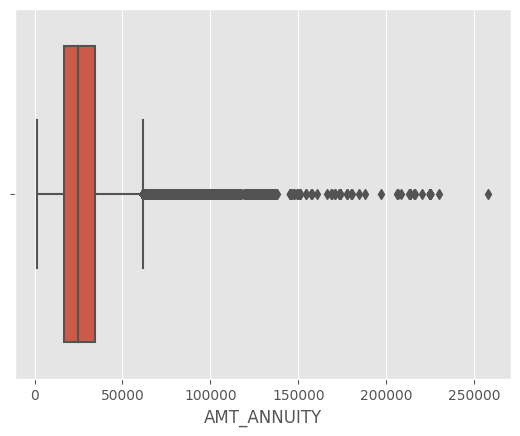

In [ ]:
#Checking for any outliers using a box plot
sns.boxplot(data=df,x='AMT_ANNUITY')

We can see the outliers are present in the data and the difference between max and min is significant so, impute null values with median value rather than replacing with mean.

In [ ]:
df['AMT_ANNUITY'].fillna(value=df['AMT_ANNUITY'].median(),inplace=True)

In [ ]:
df['AMT_ANNUITY'].isna().sum()


0

'AMT_GOODS_PRICE' Variable

In [ ]:
#Null values in AMT_GOODS_PRICE column
df['AMT_GOODS_PRICE'].isna().sum()

0

<Axes: xlabel='AMT_GOODS_PRICE'>

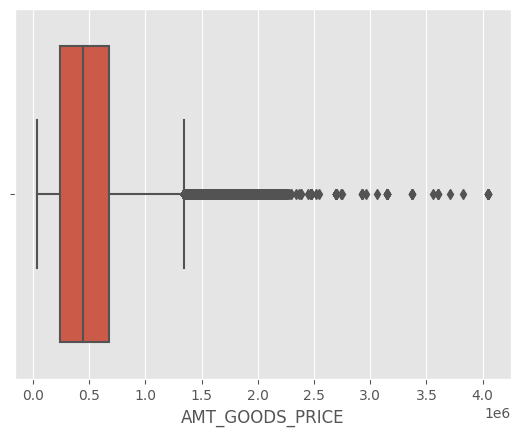

In [ ]:
#Checking for any outliers using a box plot
sns.boxplot(data=df,x='AMT_GOODS_PRICE')

In [ ]:
# Imputing null values with median
df['AMT_GOODS_PRICE'].fillna(value=df['AMT_GOODS_PRICE'].median(),inplace=True)

In [ ]:
df['AMT_GOODS_PRICE'].isna().sum()

0

'NAME_TYPE_SUITE' Variable

In [ ]:
# Checking for the percentage of null values in NAME_TYPE_SUITE categorical variable
df['NAME_TYPE_SUITE'].isna().sum()/len(df)

0.004201475719567756

As a categorical variable, 'NAME TYPE SUITE' contains around 0.42% missing values. Therefore, we may impute the missing data with the most common group, "Unaccompanied."

In [ ]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].value_counts().index[0])

In [ ]:
df['NAME_TYPE_SUITE'].isna().sum()

1292

'OCCUPATION_TYPE' Variable


In [ ]:
# Checking for the percentage of null values in OCCUPATION_TYPE categorical variable
df['OCCUPATION_TYPE'].isna().sum()/len(df)

0.0

In [ ]:
df['OCCUPATION_TYPE'].value_counts().index[0]

'Laborers'

As a categorical variable, 'OCCUPATION_TYPE' contains around 31.3% missing values. Therefore, we may impute the missing data with the most common group, "Laborers."

In [ ]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].value_counts().index[0])

In [ ]:
df['OCCUPATION_TYPE'].isna().sum()

0

'EXT_SOURCE_2' Variable

In [ ]:
df['EXT_SOURCE_2'].isna().sum()/len(df)*100

0.21462646864665005

<Axes: xlabel='EXT_SOURCE_2'>

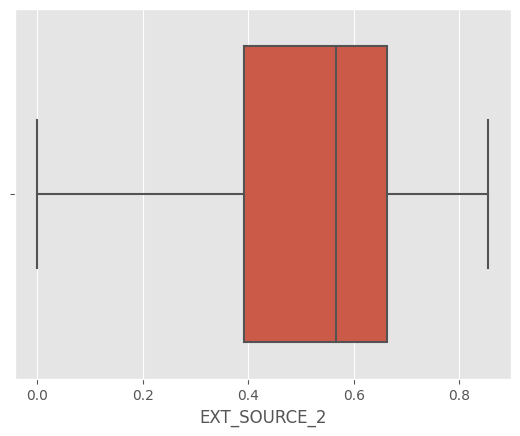

In [ ]:
#Checking for any outliers using a box plot
sns.boxplot(data=df,x='EXT_SOURCE_2')

Because there are no outliers in the data, we may impute missing values using the mean.


In [ ]:
# Imputing null values with mode
df['EXT_SOURCE_2'].fillna(value=df['EXT_SOURCE_2'].mean(),inplace=True)

In [ ]:
df['EXT_SOURCE_2'].isna().sum()

'CODE_GENDER' Variable

In [ ]:
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

As can be seen, Female(F) is the majority, and just four rows include XNA values. Thus, updating those columns with Gender = 'F' will not have a significant effect on the dataset.

In [ ]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].fillna(value=df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)
print(df.DAYS_LAST_PHONE_CHANGE)

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64


In [ ]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().index[0])

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_DAY'] = df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts().index[0])

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts().index[0])


In [ ]:
df['AMT_REQ_CREDIT_BUREAU_MON'] = df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts().index[0])

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().index[0])

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().index[0])

In [ ]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head()

NAME_TYPE_SUITE             0.420148
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
dtype: float64

Almost all the null values in the data have been handeled

In [ ]:
df[df['ORGANIZATION_TYPE']=='XNA']['NAME_INCOME_TYPE'].head()

8     Pensioner
11    Pensioner
23    Pensioner
38    Pensioner
43    Pensioner
Name: NAME_INCOME_TYPE, dtype: object

We can see, for almost  all the instances where 'ORGANIZATION_TYPE' = 'XNA' they fall in Pensioner Income category

In [ ]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA','Pensioner')

<Axes: xlabel='CNT_CHILDREN'>

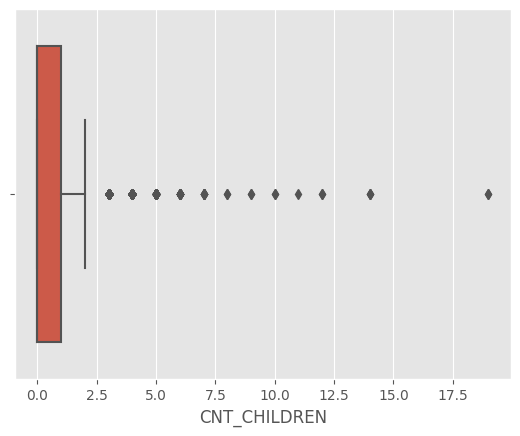

In [ ]:
sns.boxplot(data=df,x='CNT_CHILDREN')

### Changing Data Types for modelling

All float data types can be converted to integer data types.

In [ ]:
cols=df.select_dtypes(include='number').columns
cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [ ]:
df[cols]= df[cols].astype('int64',errors='ignore')

In [ ]:
cols=df.select_dtypes(include='object').columns
cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

In [ ]:
df[cols]= df[cols].astype('str',errors='ignore')

In [ ]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])//365
df['DAYS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [ ]:
df['DAYS_EMPLOYED'] = round(abs(df.DAYS_EMPLOYED/365),2)
df['DAYS_EMPLOYED']

0            1.75
1            3.25
2            0.62
3            8.33
4            8.32
           ...   
307506       0.65
307507    1000.67
307508      21.70
307509      13.11
307510       3.46
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [ ]:
df['DAYS_REGISTRATION'] = round(abs(df['DAYS_REGISTRATION']/365),2)
df['DAYS_REGISTRATION']

0          9.99
1          3.25
2         11.67
3         26.94
4         11.81
          ...  
307506    23.17
307507    12.02
307508    18.46
307509     7.02
307510    14.05
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [ ]:
df['DAYS_ID_PUBLISH'] = round(abs(df['DAYS_ID_PUBLISH']/365),2)
df['DAYS_ID_PUBLISH']

### Dealing with outliers

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_

In [ ]:
px.box(df,x='AMT_INCOME_TOTAL',height=300,width=700,template='plotly_white',
      title="Box plot of AMT_INCOME_TOTAL Variable")

We can see that there is no statistically significant difference across quantiles, and as income is a continuous variable, it varies from person to person.

# after outlier filteration

In [ ]:
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['AMT_INCOME_TOTAL'] >= Q1 - 1.5 * IQR) & (df['AMT_INCOME_TOTAL'] <= Q3 + 1.5 * IQR)
df = df.loc[filter]

px.box(df,x='AMT_INCOME_TOTAL',height=300,width=700,template='plotly_white',
      title="Box plot of 'AMT_INCOME_TOTAL' Variable")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
px.box(df,x='AMT_CREDIT',height=300,width=700,template='plotly_white',
      title="Box plot of AMT_CREDIT Variable")

Output hidden; open in https://colab.research.google.com to view.

We can see that there is no statistically significant difference across quantiles, and as credit is a continuous variable, it varies from person to person.

# after outlier filteration

In [ ]:
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['AMT_CREDIT'] >= Q1 - 1.5 * IQR) & (df['AMT_CREDIT'] <= Q3 + 1.5 * IQR)
df = df.loc[filter]

px.box(df,x='AMT_CREDIT',height=300,width=700,template='plotly_white',
      title="Box plot of AMT_CREDIT Variable")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
px.box(df,x='DAYS_BIRTH',height=300,width=700,template='plotly_white',
      title="Box plot of DAYS_BIRTH Variable")

According to the box plot, there are no outliers. There is no substantial gap between the mean and the median.

<Axes: xlabel='AMT_ANNUITY'>

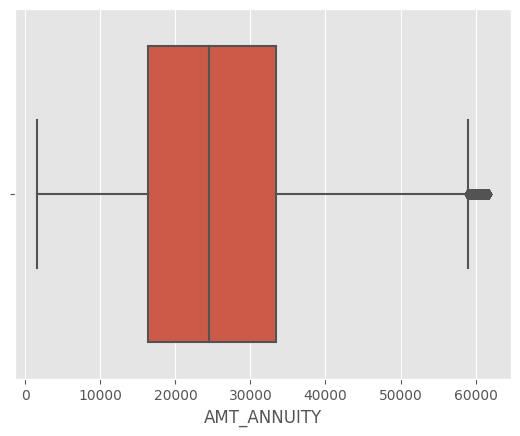

In [ ]:
sns.boxplot(data=df,x='AMT_ANNUITY')

# after outlier filteration

In [ ]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['AMT_ANNUITY'] >= Q1 - 1.5 * IQR) & (df['AMT_ANNUITY'] <= Q3 + 1.5 * IQR)
df = df.loc[filter]

sns.boxplot(data=df,x='AMT_ANUITY')

ValueError: ignored

In [ ]:
px.box(df,x='AMT_GOODS_PRICE',height=300,width=700,template='plotly_white',
      title="Box plot of AMT_GOODS_PRICE Variable")

Output hidden; open in https://colab.research.google.com to view.

Observing the box plot, we can say that 30% of the data are outliers indicates that the data is widely spread and requires additional investigation.We can see that there is no statistically significant difference across quantiles, and as income is a continuous variable, it varies from person to person.

# after outlier elimination

TypeError: ignored

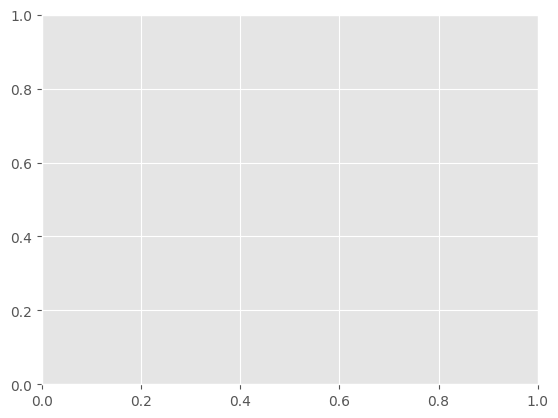

In [ ]:
Q1 = df['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = df['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['AMT_GOODS_PRICE'] >= Q1 - 1.5 * IQR) & (df['AMT_GOODS_PRICE'] <= Q3 + 1.5 * IQR)
df = df.loc[filter]

px.box(df,x='AMT_GOODS_PRICE',height=300,width=700,template='plotly_white',
      title="Box plot of AMT_GOODS_PRICE Variable")

## Continous variables binning

In [ ]:
#Creating a categorical variable based on income total
df['AMT_INCOME_TOTAL_CAT'] = pd.qcut(df['AMT_INCOME_TOTAL'],q=[0,0.2,0.5,0.8,0.95,1],
       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [ ]:
df['AMT_INCOME_TOTAL_CAT'].head()

0     Medium
1       High
2    VeryLow
3        Low
4        Low
Name: AMT_INCOME_TOTAL_CAT, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [ ]:
#Creating a categorical variable based on credit amount
df['AMT_CREDIT_CAT'] = pd.qcut(df['AMT_CREDIT'],q=[1,0.95,0.8,0.5,0.2,0],
       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [ ]:
df['AMT_CREDIT_CAT'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: AMT_CREDIT_CAT, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [ ]:
#Creating a categorical variable based on total_amount of goods
df['AMT_GOODS_PRICE_CAT'] = pd.qcut(df['AMT_GOODS_PRICE'],q=[0,0.2,0.5,0.8,0.95,1],
       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [ ]:
df['AMT_GOODS_PRICE_CAT'].head()

0        Low
1       High
2    VeryLow
3        Low
4     Medium
Name: AMT_GOODS_PRICE_CAT, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [ ]:
#Creating a categorical variable based on total_amount of annuity
df['AMT_ANNUITY_CAT'] = pd.qcut(df['AMT_ANNUITY'],q=[0,0.2,0.5,0.8,0.95,1],
       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [ ]:
df['AMT_ANNUITY_CAT'].head()

0     Medium
1       High
2    VeryLow
3     Medium
4        Low
Name: AMT_ANNUITY_CAT, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [ ]:
df['DAYS_BIRTH'].max()

69

In [ ]:
#Creating a categorical variable based on total_amount of annuity
bins=[0,20,30,40,50,60,70]
labels=['0-20','21-30','31-40','41-50','51-60','61-70']
df['DAYS_BIRTH_CAT'] = pd.cut(df['DAYS_BIRTH'],bins=bins,labels=labels,right=True)


In [ ]:
df['DAYS_BIRTH_CAT'].head()

0    21-30
1    41-50
2    51-60
3    51-60
4    51-60
Name: DAYS_BIRTH_CAT, dtype: category
Categories (6, object): ['0-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70']

In [ ]:
# Creating a new column determining the ratio of AMT_CREDIT and AMT_INCOME_TOTAL.
df['CREDIT_INCOME_RATIO']=round((df['AMT_CREDIT']/df['AMT_INCOME_TOTAL']),1)


In [ ]:
# Creating a new column determining the proportion of the individual's social circle who defaulted after 30DPD.
df['30DPD_default_social_circle']=df['DEF_30_CNT_SOCIAL_CIRCLE']/df['OBS_30_CNT_SOCIAL_CIRCLE']


In [ ]:
df.drop(columns=['DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE'],inplace=True)

In [ ]:
df['30DPD_default_social_circle'] = round(df['30DPD_default_social_circle']*100,2)
df['30DPD_default_social_circle']

0         100.0
1           0.0
2           NaN
3           0.0
4           NaN
          ...  
307506      NaN
307507      NaN
307508      0.0
307509      NaN
307510      NaN
Name: 30DPD_default_social_circle, Length: 281139, dtype: float64

In [ ]:
df['30DPD_default_social_circle'].fillna(value=0,inplace=True)

In [ ]:
df['30DPD_default_social_circle']

0         100.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
307506      0.0
307507      0.0
307508      0.0
307509      0.0
307510      0.0
Name: 30DPD_default_social_circle, Length: 281139, dtype: float64

In [ ]:
# Creating a new column determining the proportion of the individual's social circle who defaulted after 60DPD.

df['60DPD_default_social_circle']=df['DEF_60_CNT_SOCIAL_CIRCLE']/df['OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
df.drop(columns=['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'],inplace=True)


In [ ]:
df['60DPD_default_social_circle'].fillna(value=0,inplace=True)

In [ ]:
df['60DPD_default_social_circle'] = round(df['60DPD_default_social_circle']*100,2)
df['60DPD_default_social_circle']

0         100.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
307506      0.0
307507      0.0
307508      0.0
307509      0.0
307510      0.0
Name: 60DPD_default_social_circle, Length: 281139, dtype: float64

In [ ]:
df.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
                'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],inplace=True)

### Analysis

In [ ]:
df['TARGET'].value_counts()

0    257737
1     23402
Name: TARGET, dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig = px.pie(df,names='TARGET', title='TARGET Variable - DEFAULTER Vs NONDEFAULTER',
      height=450,width=600,template='plotly_white')
fig.update_traces(hoverinfo='label+percent',textfont_size=13,
                 textinfo='label+percent',pull=[0,0.2])
fig.update_layout(font_size=10)
fig.show()


Using a pie chart to identify the number of defaulters (TARGET = 1) and those who paid on time (TARGET = 0), it is evident that there is an imbalance between those who defaulted and those who did not.

In [ ]:
#Splitting the data in two
df_1 = df[df['TARGET']==1]
df_0 = df[df['TARGET']==0]


####Univariate Analysis of Categorical Variables

In [ ]:
# function to count plot for categorical variables
def cat_plot(col):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,6))
    sns.countplot(x=col, data=df_1,ax=ax1,palette='Set1')
    ax1.set_ylabel('Total Count',fontweight="bold")
    ax1.set_xlabel(f'{col}', fontweight="bold")
    ax1.set_title(f'{col} disribution for Defaulters',fontsize=10)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(df_1))*100), (p.get_x()+0.05, p.get_height()+50))

    sns.countplot(x=col, data=df_0,ax=ax2,palette='Set1')
    ax2.set_ylabel('Total Count',fontweight="bold")
    ax2.set_xlabel(f'{col}', fontweight="bold")
    ax2.set_title(f'{col} distribution for NON_Defaulters',fontsize=10)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
  # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.2f}%'.format((p.get_height()/len(df_0))*100), (p.get_x()+0.05, p.get_height()+50))
    plt.subplots_adjust(wspace=0.2,hspace=.3)
    plt.show()

In [ ]:
cat_cols=df.select_dtypes(exclude='number').columns

In [ ]:
cat_cols=cat_cols.drop(['OCCUPATION_TYPE','ORGANIZATION_TYPE'])

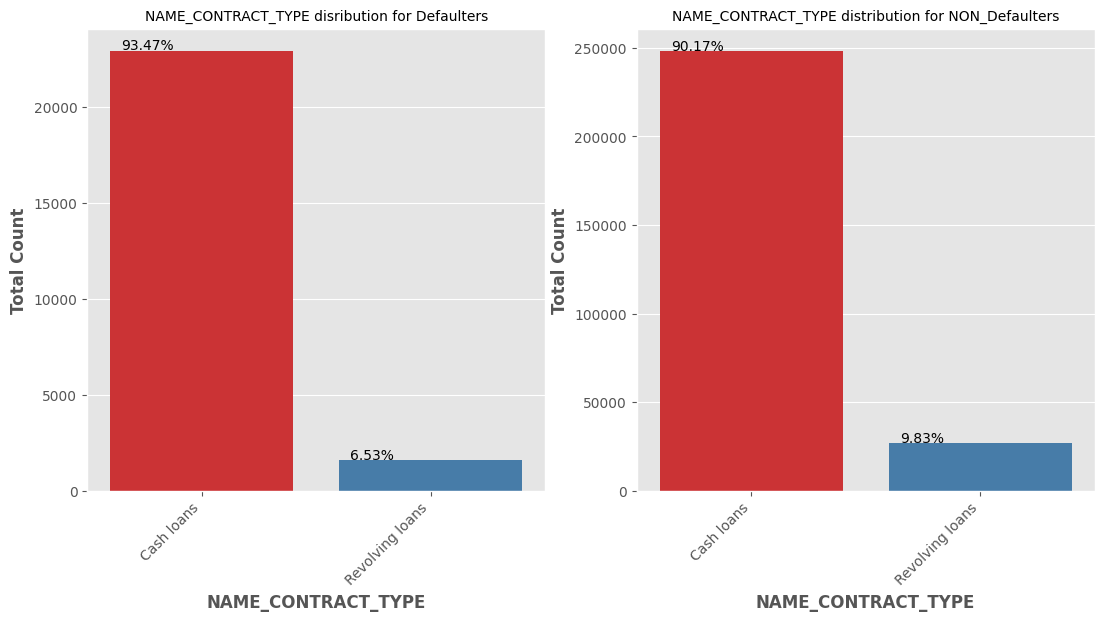

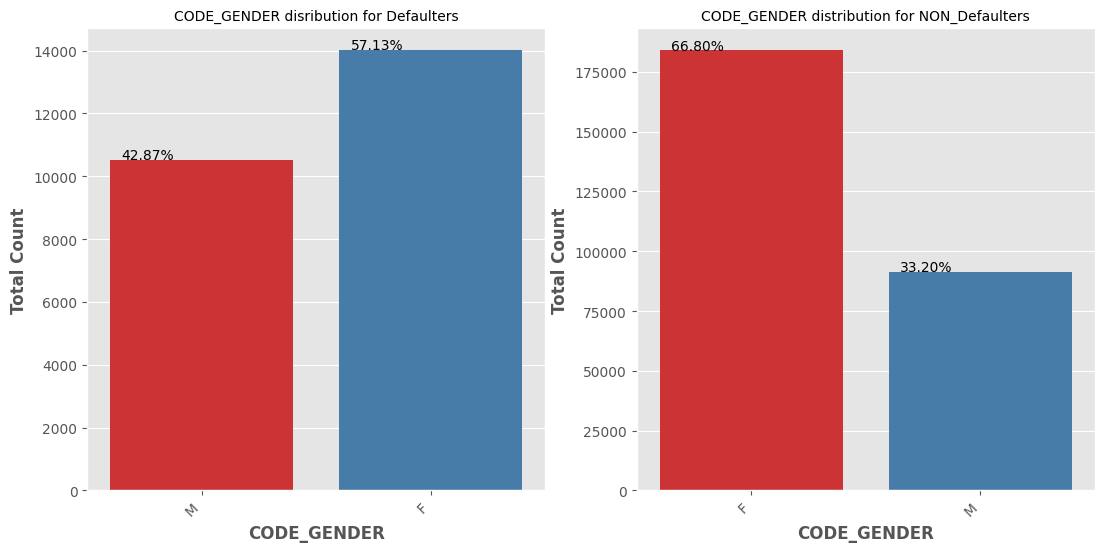

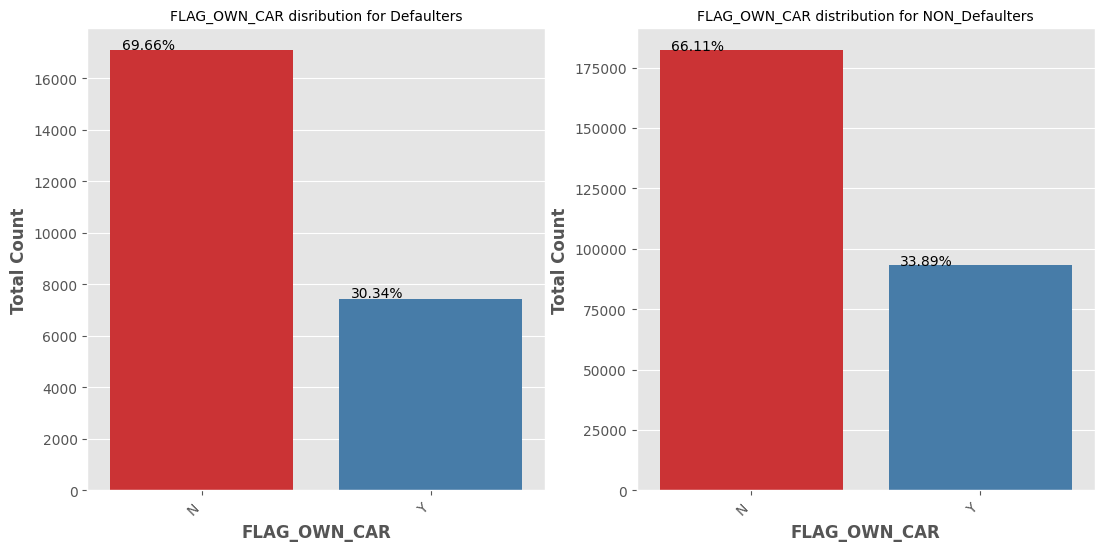

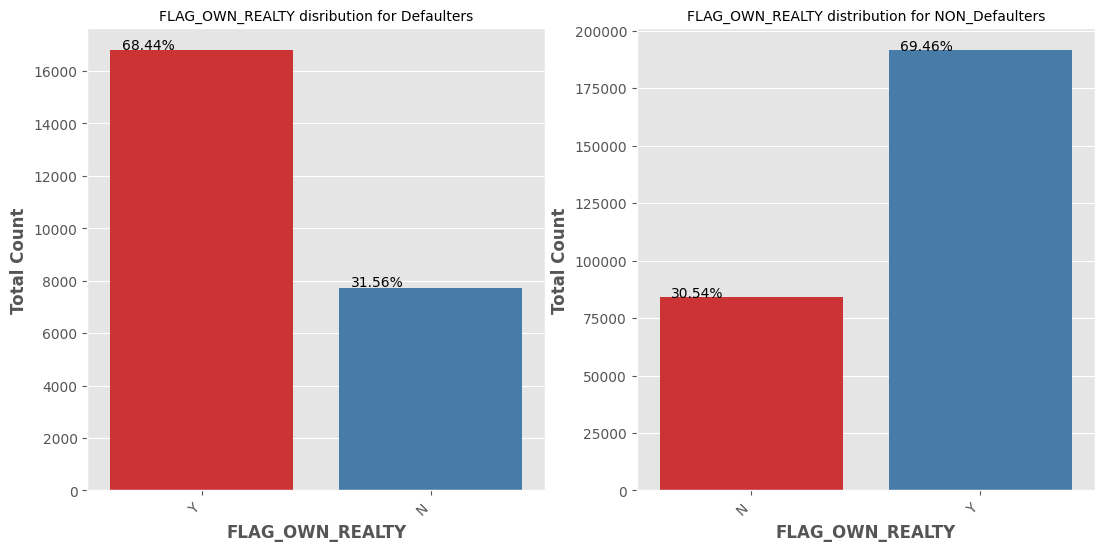

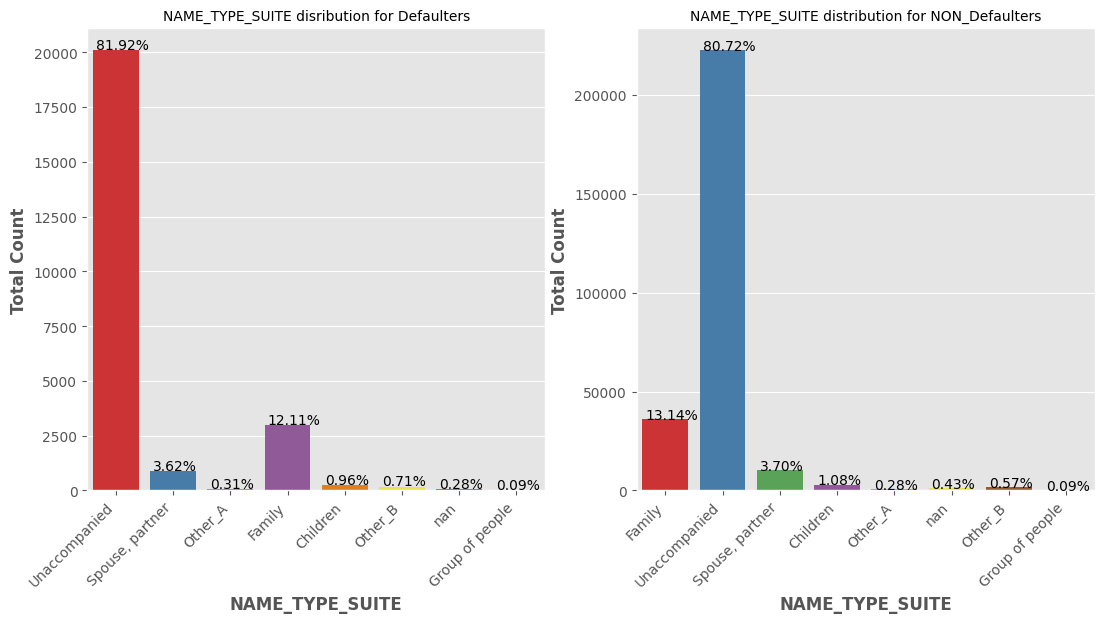

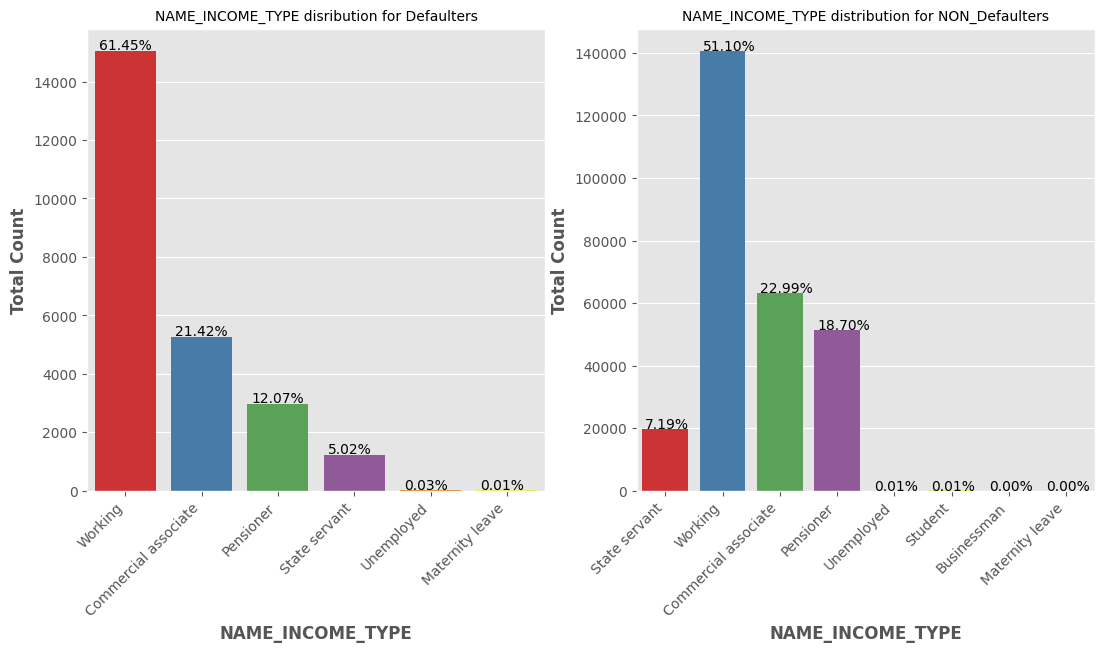

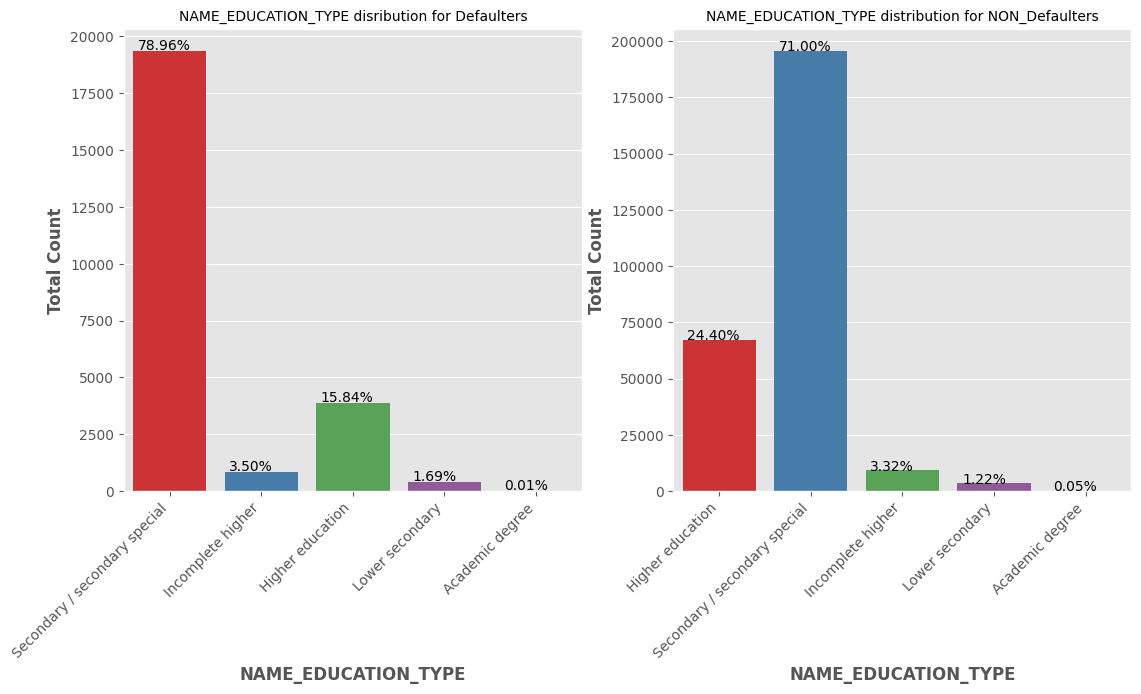

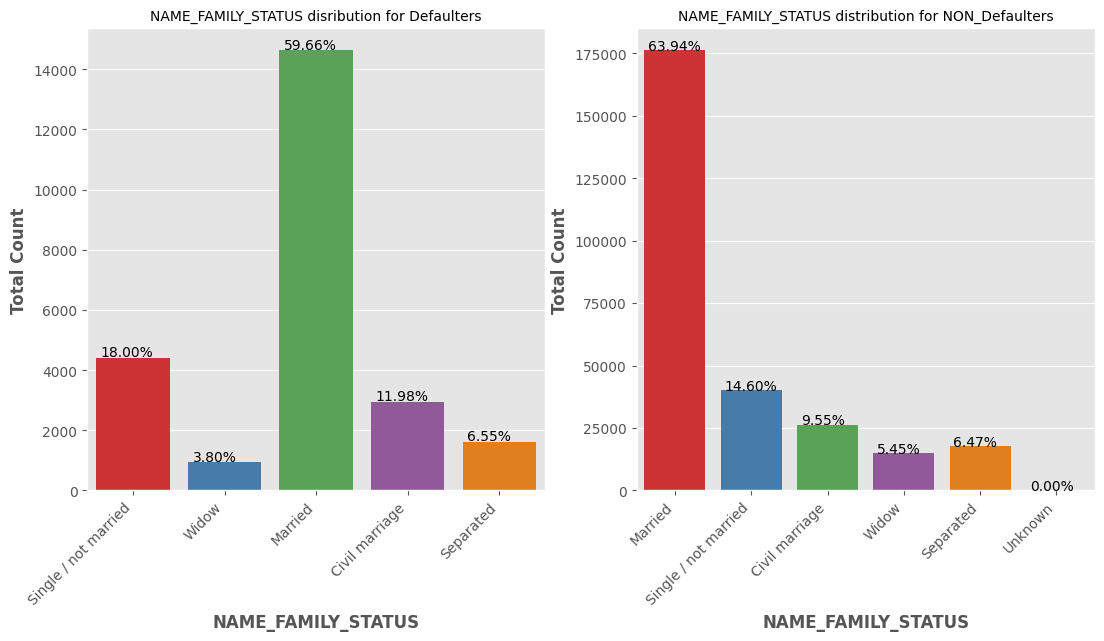

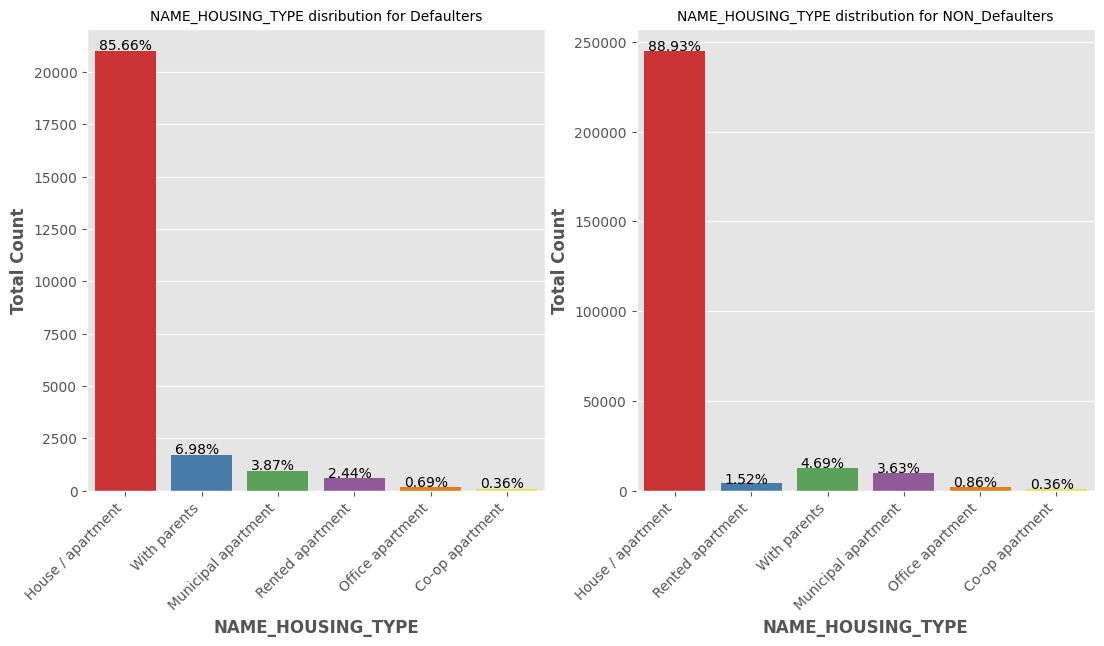

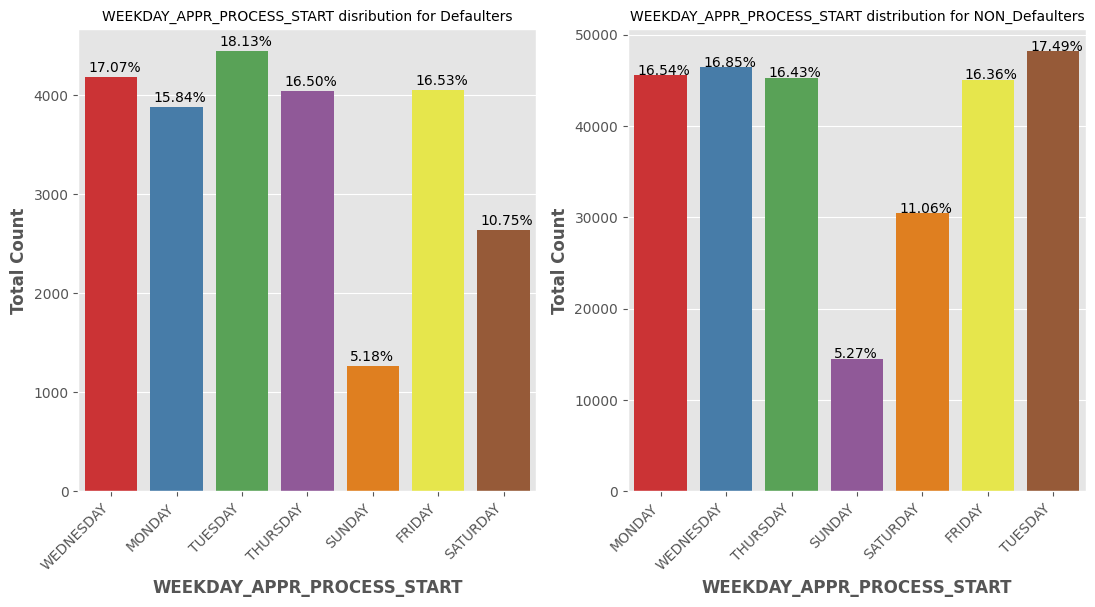

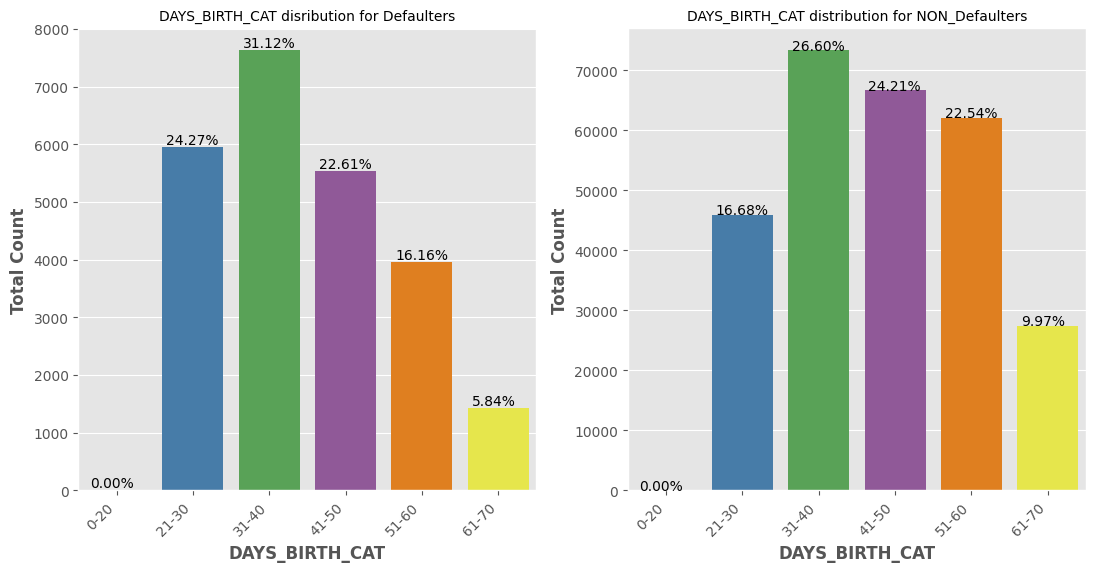

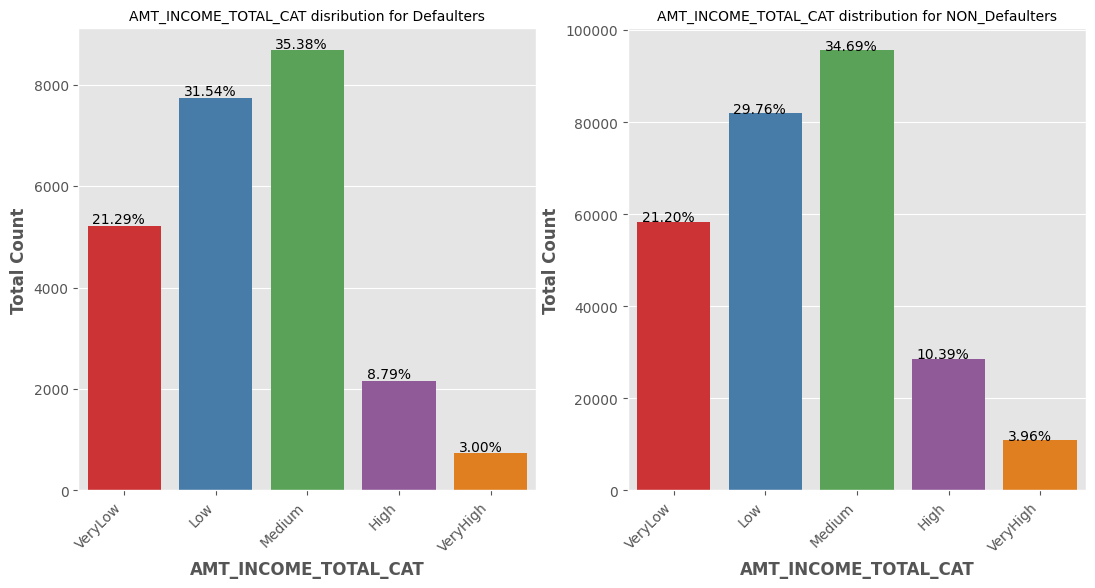

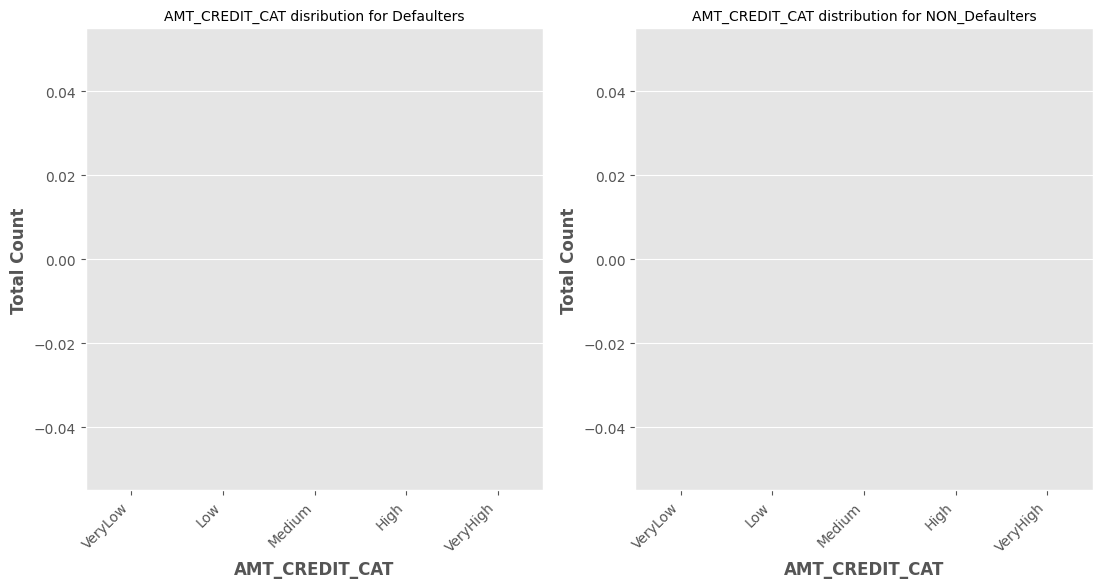

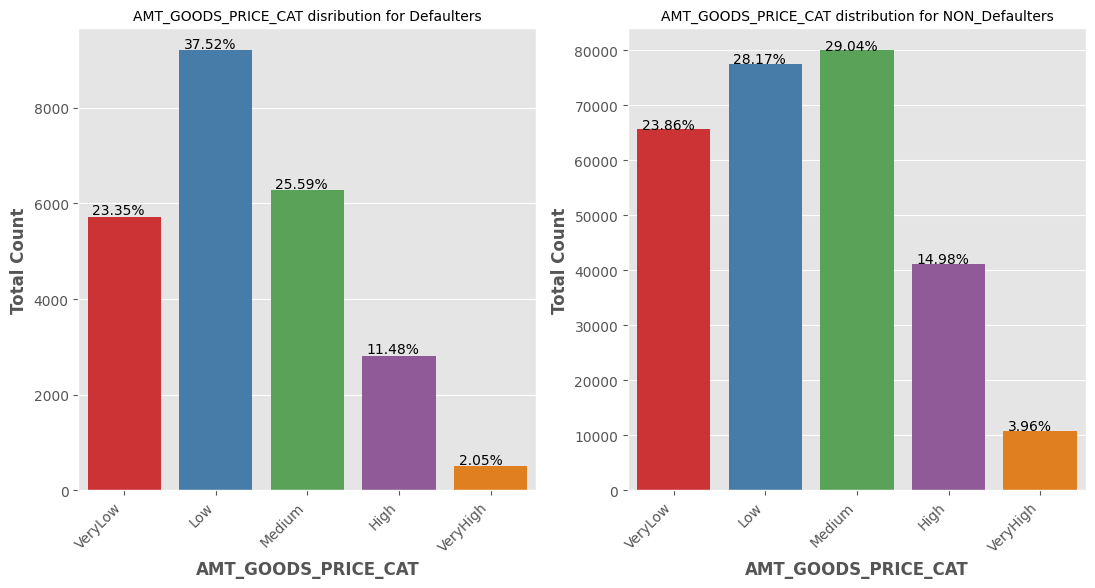

In [ ]:
for col in cat_cols:
    cat_plot(col)

#### Inferences:
1. NAME_CONTRACT_TYPE
* Cash Loan contracts have a higher number of credit than revolving loan contracts(Defaulters)
* Cash Loan contracts have a higher number of credit than revolving loan contracts(Non-Defaulters)
* Count of female is more

2. CODE_GENDER
* Females account for 67% of the non-defaulters and 55% of the defaulters, respectively. We may assume that because more women seek for loans than men, there are also more women who fail on their payments.However, the default rate of FEMALES is much lower than that of their MALE counterparts.

3. FLAG_OWN_CAR
* We can observe that automobile owners make up 65.7% of the non-defaulters and 69.5% of the defaulters. While persons with vehicles are more likely to default, the explanation may be that there are more people without cars. Considering the percentages in both figures, we can deduce that the default rate of automobile owners is lower than that of carless individuals.

4. NAME_TYPE_SUIT
* The majority of loan applicants were accompanied throughout the application process. And with a few customers, a family member was present for both Defaulters and Non-Defaulters, but the presence of a family member during loan application had no impact on default. Moreover, both populations have identical proportions.

5. NAME_INCOME_TYPE
* State Servant AND Businessman is at Minimal risk to default
* Most of the loans are distributed to working class people, In addition, we see that the working class contributes 51% to non-defaulters but 61% to defaulters. Clearly, the likelihood of default is greater for them.

6. NAME_EDUCATION_TYPE
* Except for those with a higher level of education, who are less likely to fail, and those with a secondary level of education, who are more likely to default, almost all Education groups are equally likely to default.

7. NAME_FAMILY_STATUS
* Married Clients seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
* The graph, however, reveals that Single/non-Married individuals contribute 14.5% to Non-Defaulters and 18% to Defaulters. Therefore, there is a greater danger connected with them.

8. NAME_HOUSING_TYPE
* It is evident from the graph that homeowners/tenants are more likely to seek for loans. People who live with their parents tend to default more often than others. Due to their parents living with them, their living expenditures might be greater.

9. NAME_INCOME_CAT
* The Very High Income category defaults less often. They provide 12.4% to the overall number of defaulters, but 15.6% to the number of Non-Defaulters.

10. AMT_CREDIT_CAT
* The Very High Credit category defaults less often, greatest risk is related with those who belong into the Low to Medium Credit amount category.

11. AMT_GOODS_PRICE_CAT
*  The High & Very High Good Price category defaults less often, greatest risk is related with those who belong into the Low and Very Low Good price category.

12. DAYS_BIRTH_CAT
* We see that those between the ages of 20 and 40 tend to default more often. Therefore, they are the riskiest borrowers. Beginning at age 40, individuals tend to default less often as their age increases. One of the reasons might be because people find employment around that age, and their income improves with age.


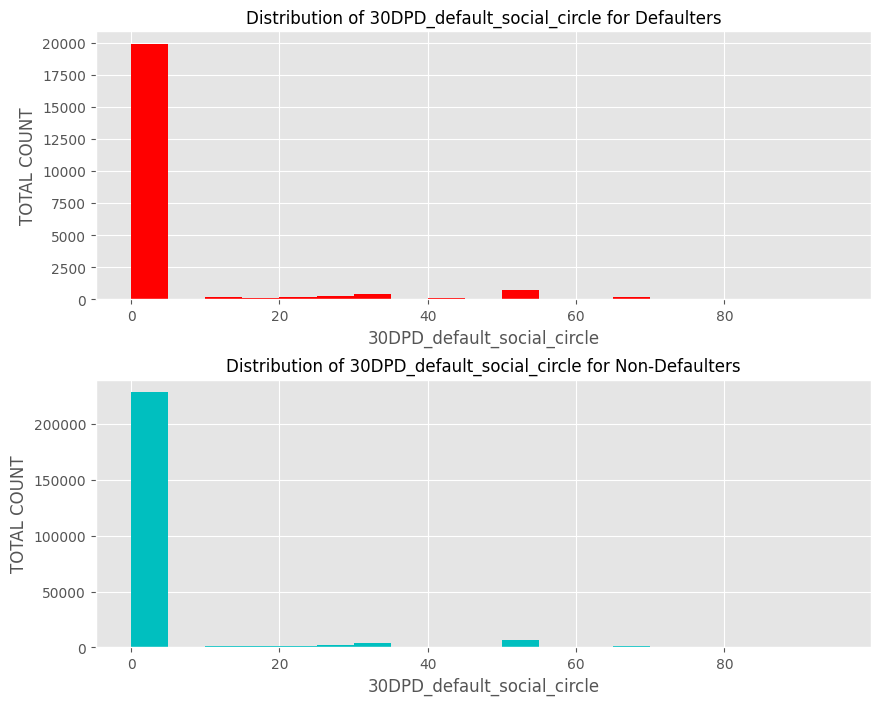

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(211)
df_1['30DPD_default_social_circle'].plot.hist(bins=np.arange(0,100,5),color="r")
plt.title('Distribution of 30DPD_default_social_circle for Defaulters',fontsize=12)
plt.xlabel('30DPD_default_social_circle')
plt.ylabel('TOTAL COUNT')

plt.subplot(212)
df_0['30DPD_default_social_circle'].plot.hist(bins=np.arange(0,100,5),color='c')
plt.title('Distribution of 30DPD_default_social_circle for Non-Defaulters',fontsize=12)
plt.xlabel('30DPD_default_social_circle')
plt.ylabel('TOTAL COUNT')

plt.subplots_adjust(hspace=.3)

plt.show()

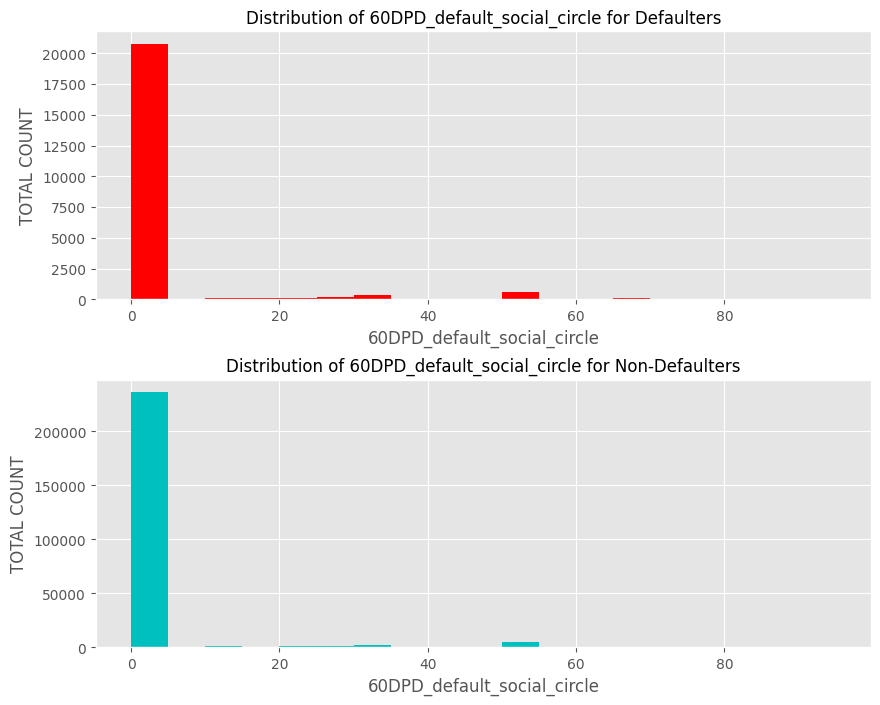

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(211)
df_1['60DPD_default_social_circle'].plot.hist(bins=np.arange(0,100,5),color='r')
plt.title('Distribution of 60DPD_default_social_circle for Defaulters',fontsize=12)
plt.xlabel('60DPD_default_social_circle')
plt.ylabel('TOTAL COUNT')

plt.subplot(212)
df_0['60DPD_default_social_circle'].plot.hist(bins=np.arange(0,100,5),color='c')
plt.title('Distribution of 60DPD_default_social_circle for Non-Defaulters',fontsize=12)
plt.xlabel('60DPD_default_social_circle')
plt.ylabel('TOTAL COUNT')

plt.subplots_adjust(hspace=.3)

plt.show()

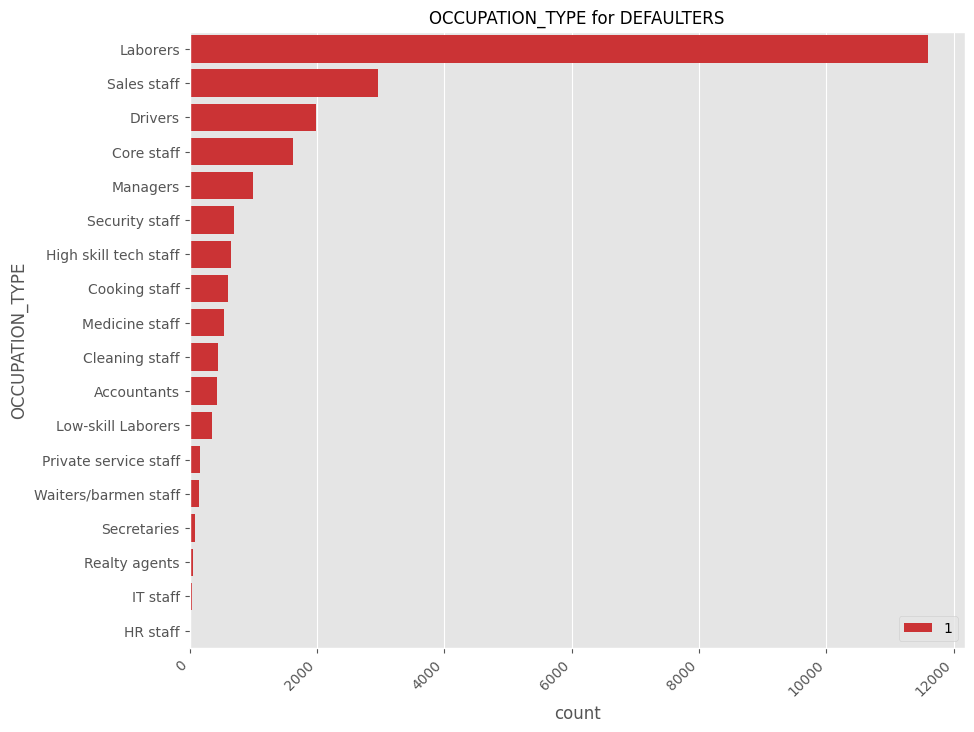

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(data=df_1,y='OCCUPATION_TYPE',hue='TARGET',
             order=df_1['OCCUPATION_TYPE'].value_counts().index,palette='Set1')
plt.title('OCCUPATION_TYPE for DEFAULTERS',fontsize=12)
plt.xticks( rotation=45, ha="right",fontsize=10)
plt.legend(loc='lower right')

plt.show()

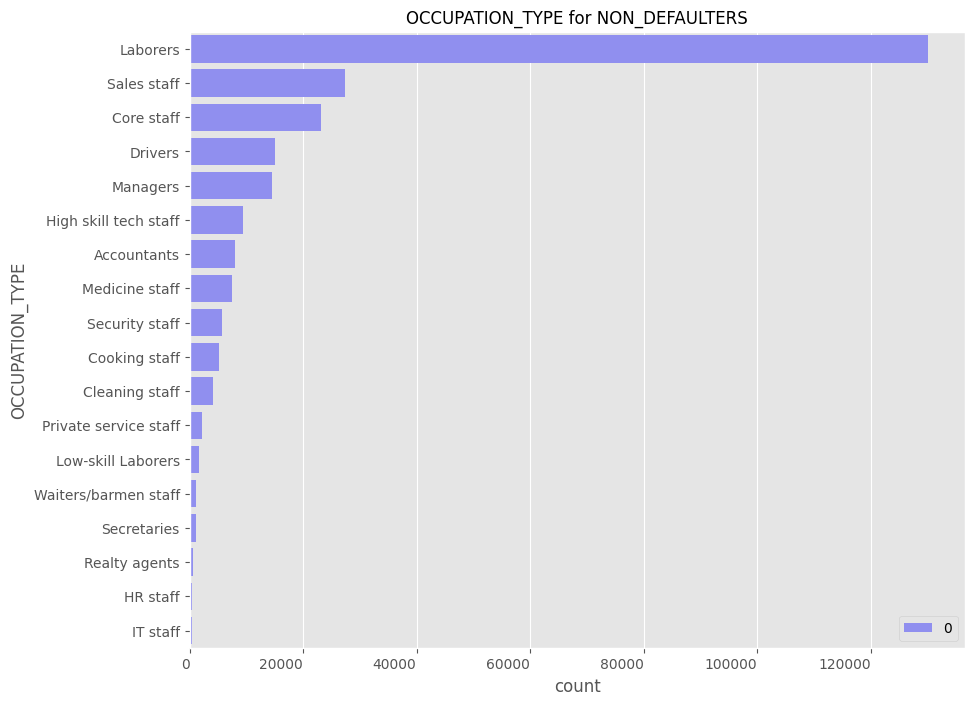

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_0,y='OCCUPATION_TYPE',hue='TARGET',
             order=df_0['OCCUPATION_TYPE'].value_counts().index,palette='cool')
plt.title('OCCUPATION_TYPE for NON_DEFAULTERS',fontsize=12)
plt.xticks( rotation=360, ha="right")
plt.yticks(fontsize=10)
plt.legend(loc='lower right')
plt.show()

#### Univariate Analysis of Numerical Variables

In [ ]:
# function to count plot for numerical variables
def num_plot(col):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
    sns.distplot(x=df_1[col],ax=ax1,kde=True,color='r')

    sns.distplot(x=df_0[col],ax=ax2,kde=True,color='b')
    ax2.set_ylabel('Total Count',fontweight="bold")
    ax2.set_xlabel(f'{col}', fontweight="bold")
    ax2.set_title(f'{col} distribution for NON_Defaulters',fontsize=14)
    ax2.set_xscale('log')

    plt.subplots_adjust(wspace=0.2)
    plt.show()


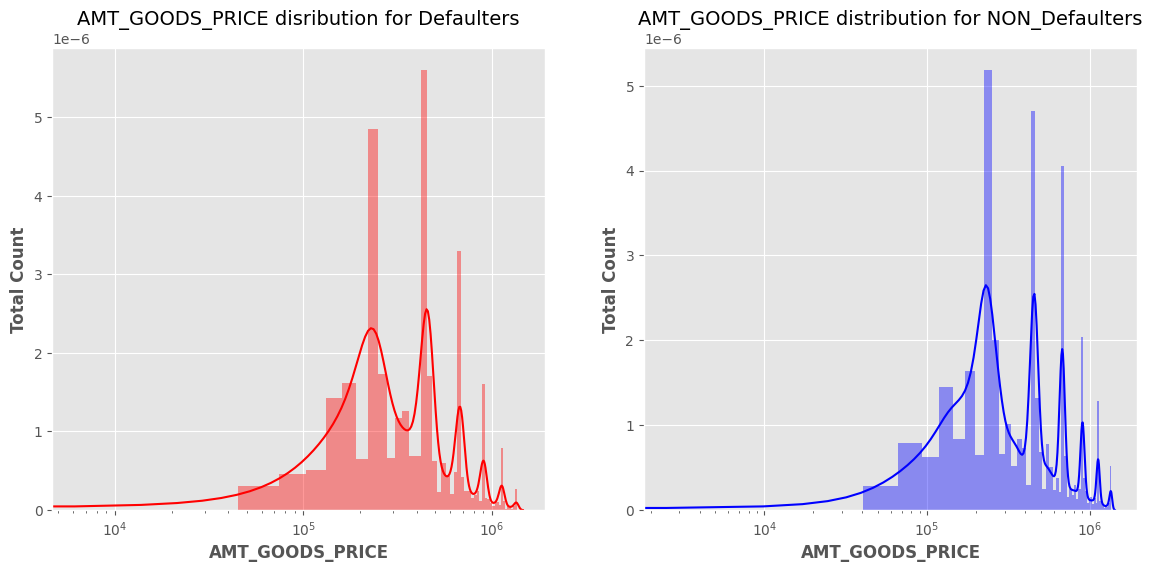

In [ ]:
num_plot('AMT_GOODS_PRICE')

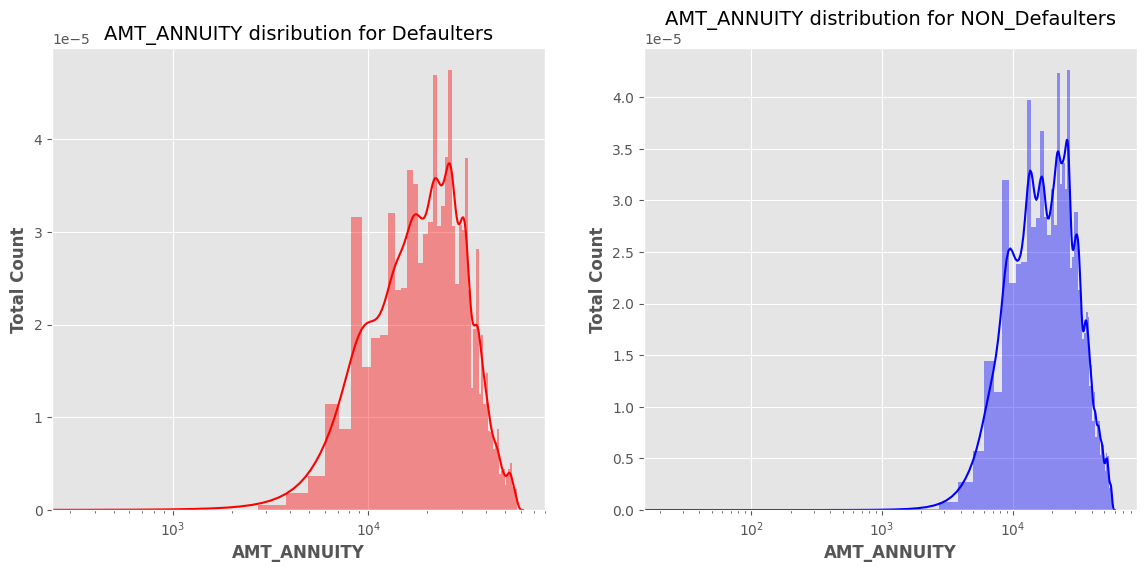

In [ ]:
num_plot('AMT_ANNUITY')

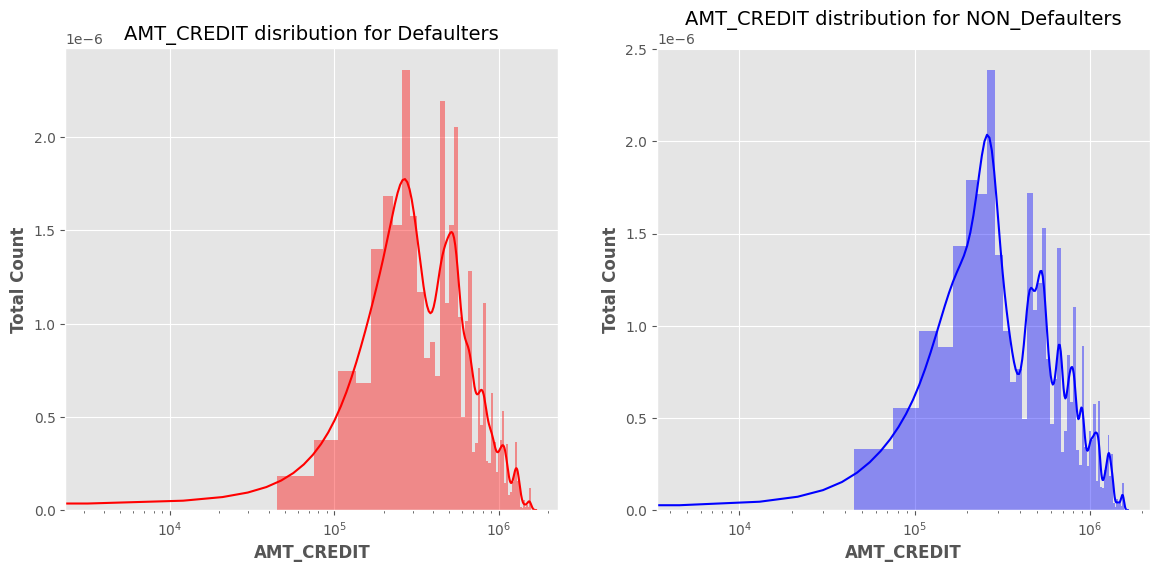

In [ ]:
num_plot('AMT_CREDIT')

* Dist. plot highlights the curve shape which is wider for Defaulters in comparison to Non-Defaulters which is narrower with well-defined edges.
* People with Payment difficulties has largely staggered income as compared to people who dosen't. Dist. plot clearly shows that the shape in Income total, Annuity, Credit and Good Price is similar for Target 0 and similar for Target 1

KeyError: ignored

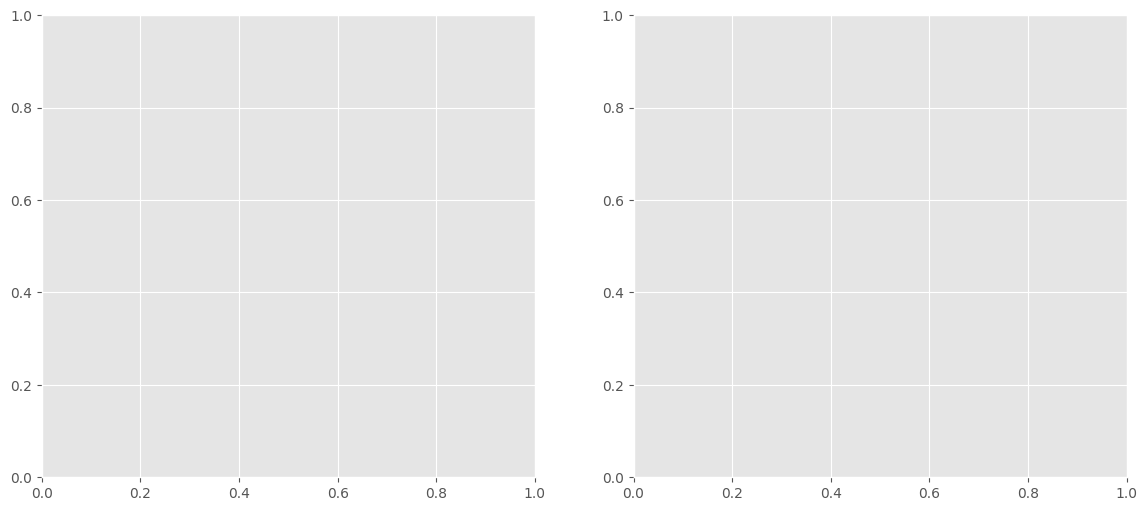

In [ ]:
num_plot('CREDIT_INCOME_RATIO')

CREDIT_INCOME_RATIO = CREDIT_AMOUNT/AMT_INCOME_TOTAL
* Although there does not seem to be an obvious distinction between the group that defaulted and the group that did not, we can see that when the CREDIT INCOME RATIO is more than 50, individuals default.

### Bivariate Analysis

 ####  Bivariate Analysis of Numerical Columns

In [ ]:
def bivarnum_plot(col1,col2):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
    sns.scatterplot(data=df_1,x=col1,y=col2,ax=ax1,)
    ax1.set_xlabel(col1)
    ax1.set_ylabel(col2)
    ax1.set_title(f'Scatter plot of {col1} vs {col2} for Defaulters',fontsize=12)

    sns.scatterplot(data=df_0,x=col1,y=col2,ax=ax2)
    ax2.set_xlabel(col1)
    ax2.set_ylabel(col2)
    ax2.set_title(f'Scatter plot of {col1} vs {col2} for Non-Defaulters',fontsize=12)
    plt.show()

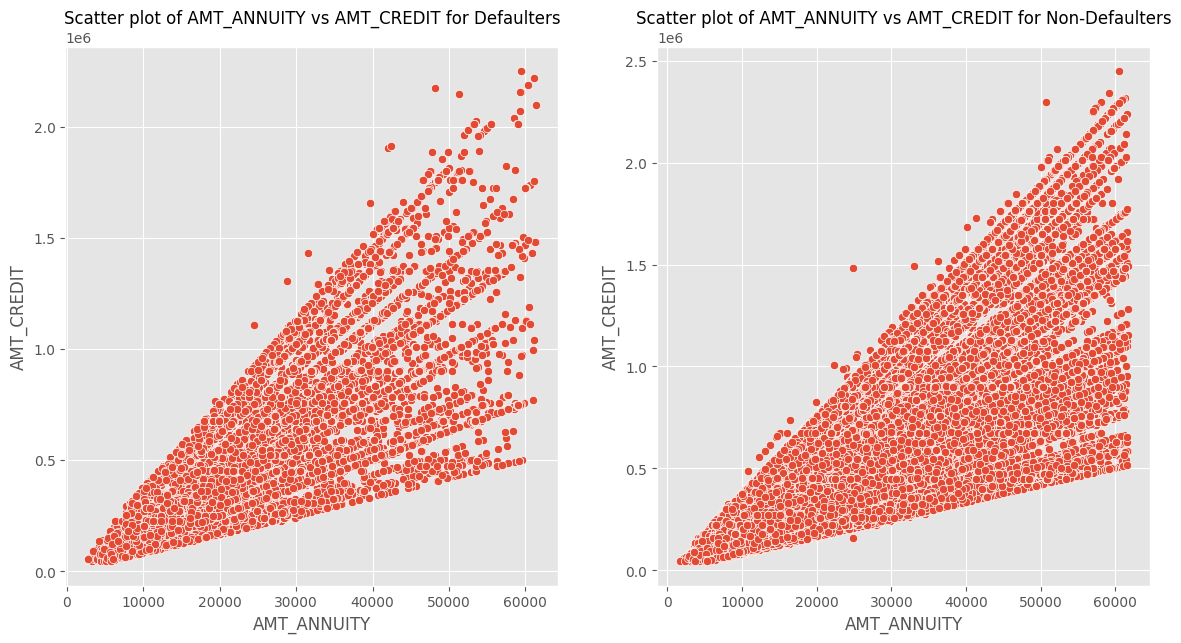

In [ ]:
bivarnum_plot('AMT_ANNUITY','AMT_CREDIT')

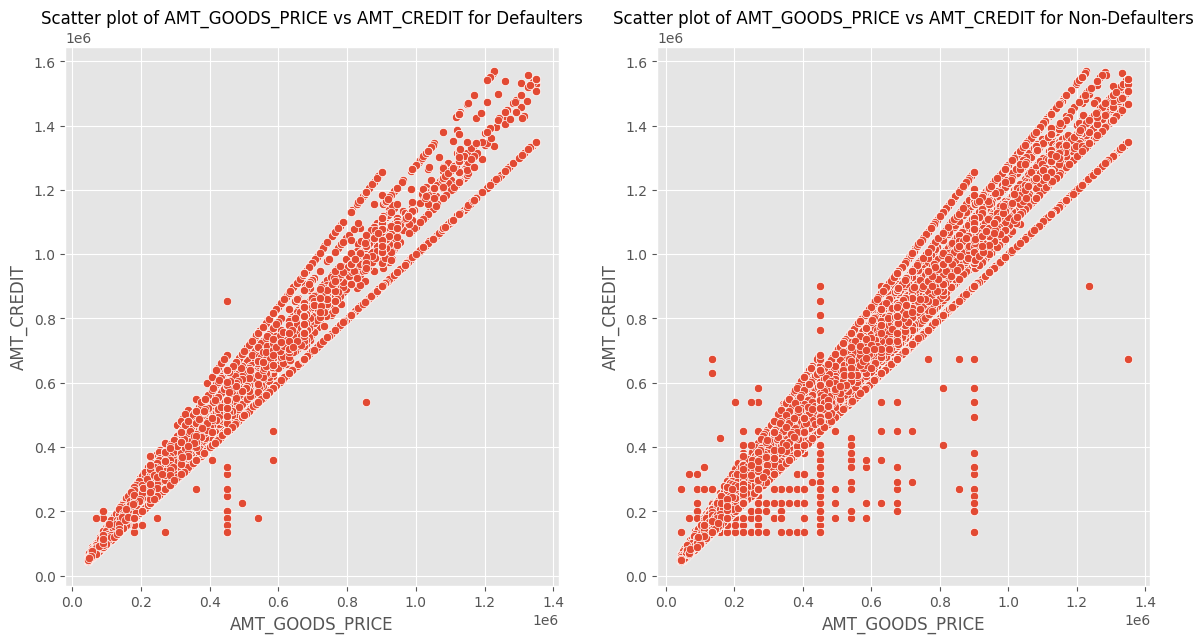

In [ ]:
bivarnum_plot('AMT_GOODS_PRICE','AMT_CREDIT')

The scatter plots reveal that persons who have not defaulted on their loans have a steeper slope than those who have had payment troubles. This means that for each unit rise in annuity and good price for which the loan is taken, the amount of credit taken by a Non-Defauter would grow higher than the amount of credit taken by a Defaulter.

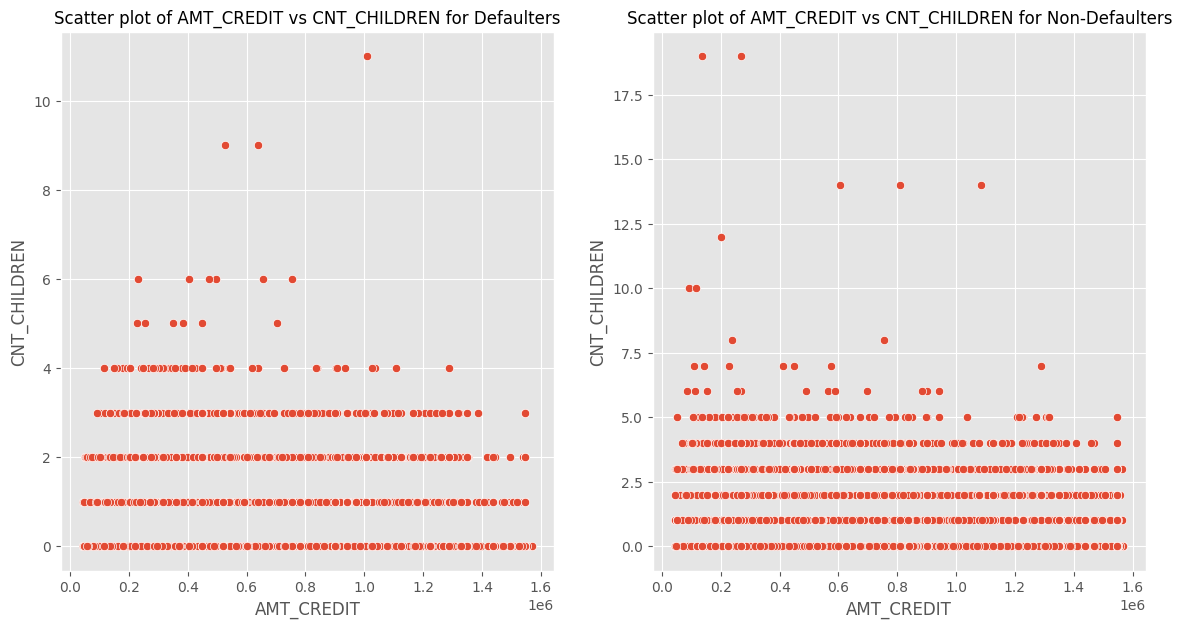

In [ ]:
bivarnum_plot('AMT_CREDIT','CNT_CHILDREN')

We can observe that the density in the bottom left corner of both cases is comparable, meaning individuals are equally likely to default if both the number of children and the AMT CREDIT are little. We may note that households with more children and bigger AMT CREDIT defaults occur less often.

#### Bivariate Analysis of Categorical and Numerical Columns

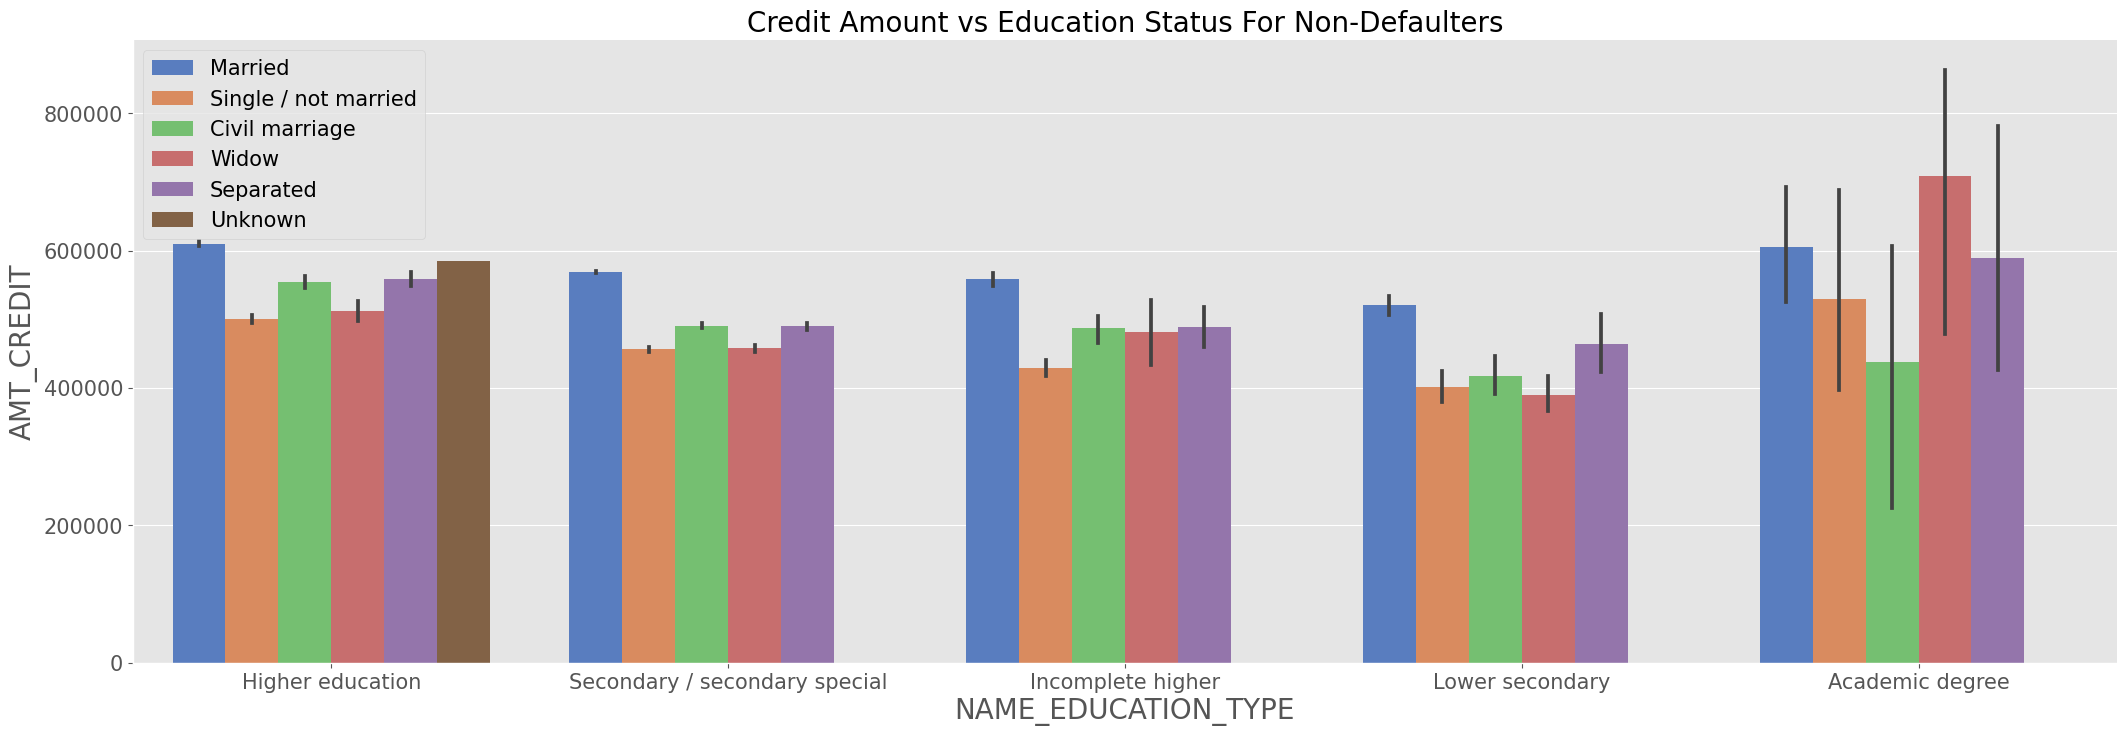

In [ ]:
sns.catplot(data=df_0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',
          palette='muted', kind='bar',height=7,aspect=3,legend=False)
plt.title('Credit Amount vs Education Status For Non-Defaulters',fontsize=20)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=20)
plt.ylabel('AMT_CREDIT',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

Conclusions  drawn from the above graph  for Non-Defaulters
* Clients who are married are having greater amount of Credit amout to clear, except from those who did pursue  lower secondary and academic degrees
* Customers with a academic degree have bigger credit limits, with the Civil Marriage category being the highest.
* Lower-educated consumers tend to have lower credit limits, with widows being the lowest.

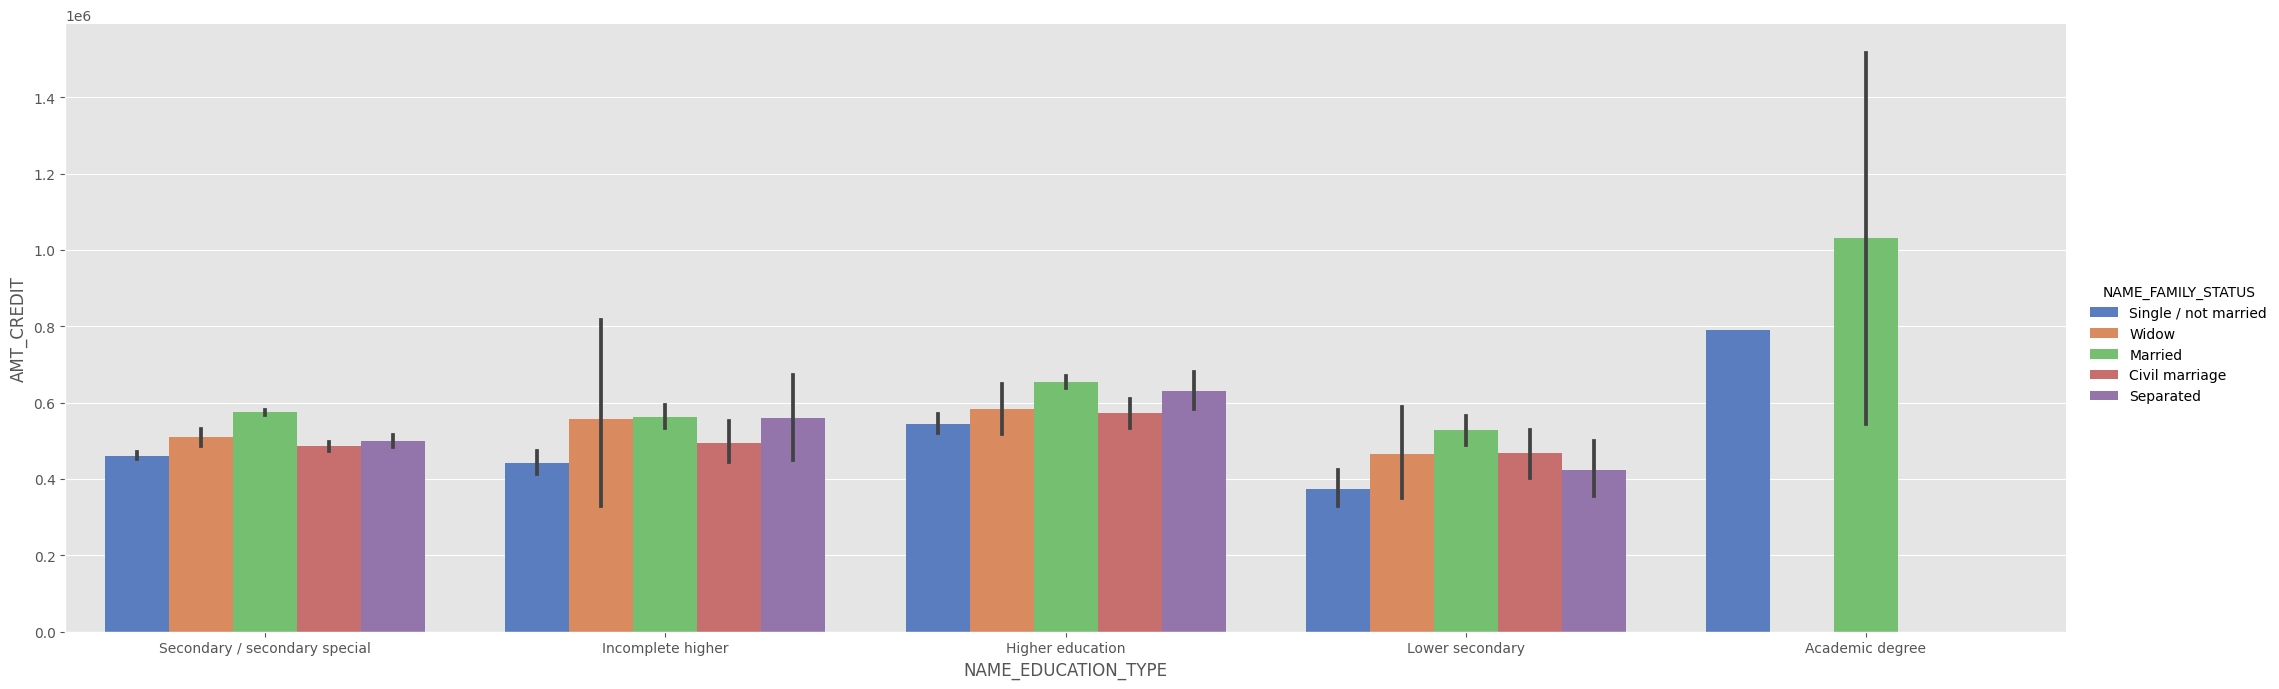

In [ ]:
sns.catplot(data=df_1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',
          palette='muted', kind='bar',height=7,aspect=3,legend=False)
plt.title('Credit Amount vs Education Status For Defaulters',fontsize=20)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=20)
plt.ylabel('AMT_CREDIT',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

Conclusions  drawn from the above graph for Defaulters
* Customers with lower education have a lower average credit limit.
* Customers with an academic degree who are married have a greater credit limit and a higher default rate.
* Across all education segments, married customers have a higher credit amount.
* Single and Married are the only 2 family types present in academic degree

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

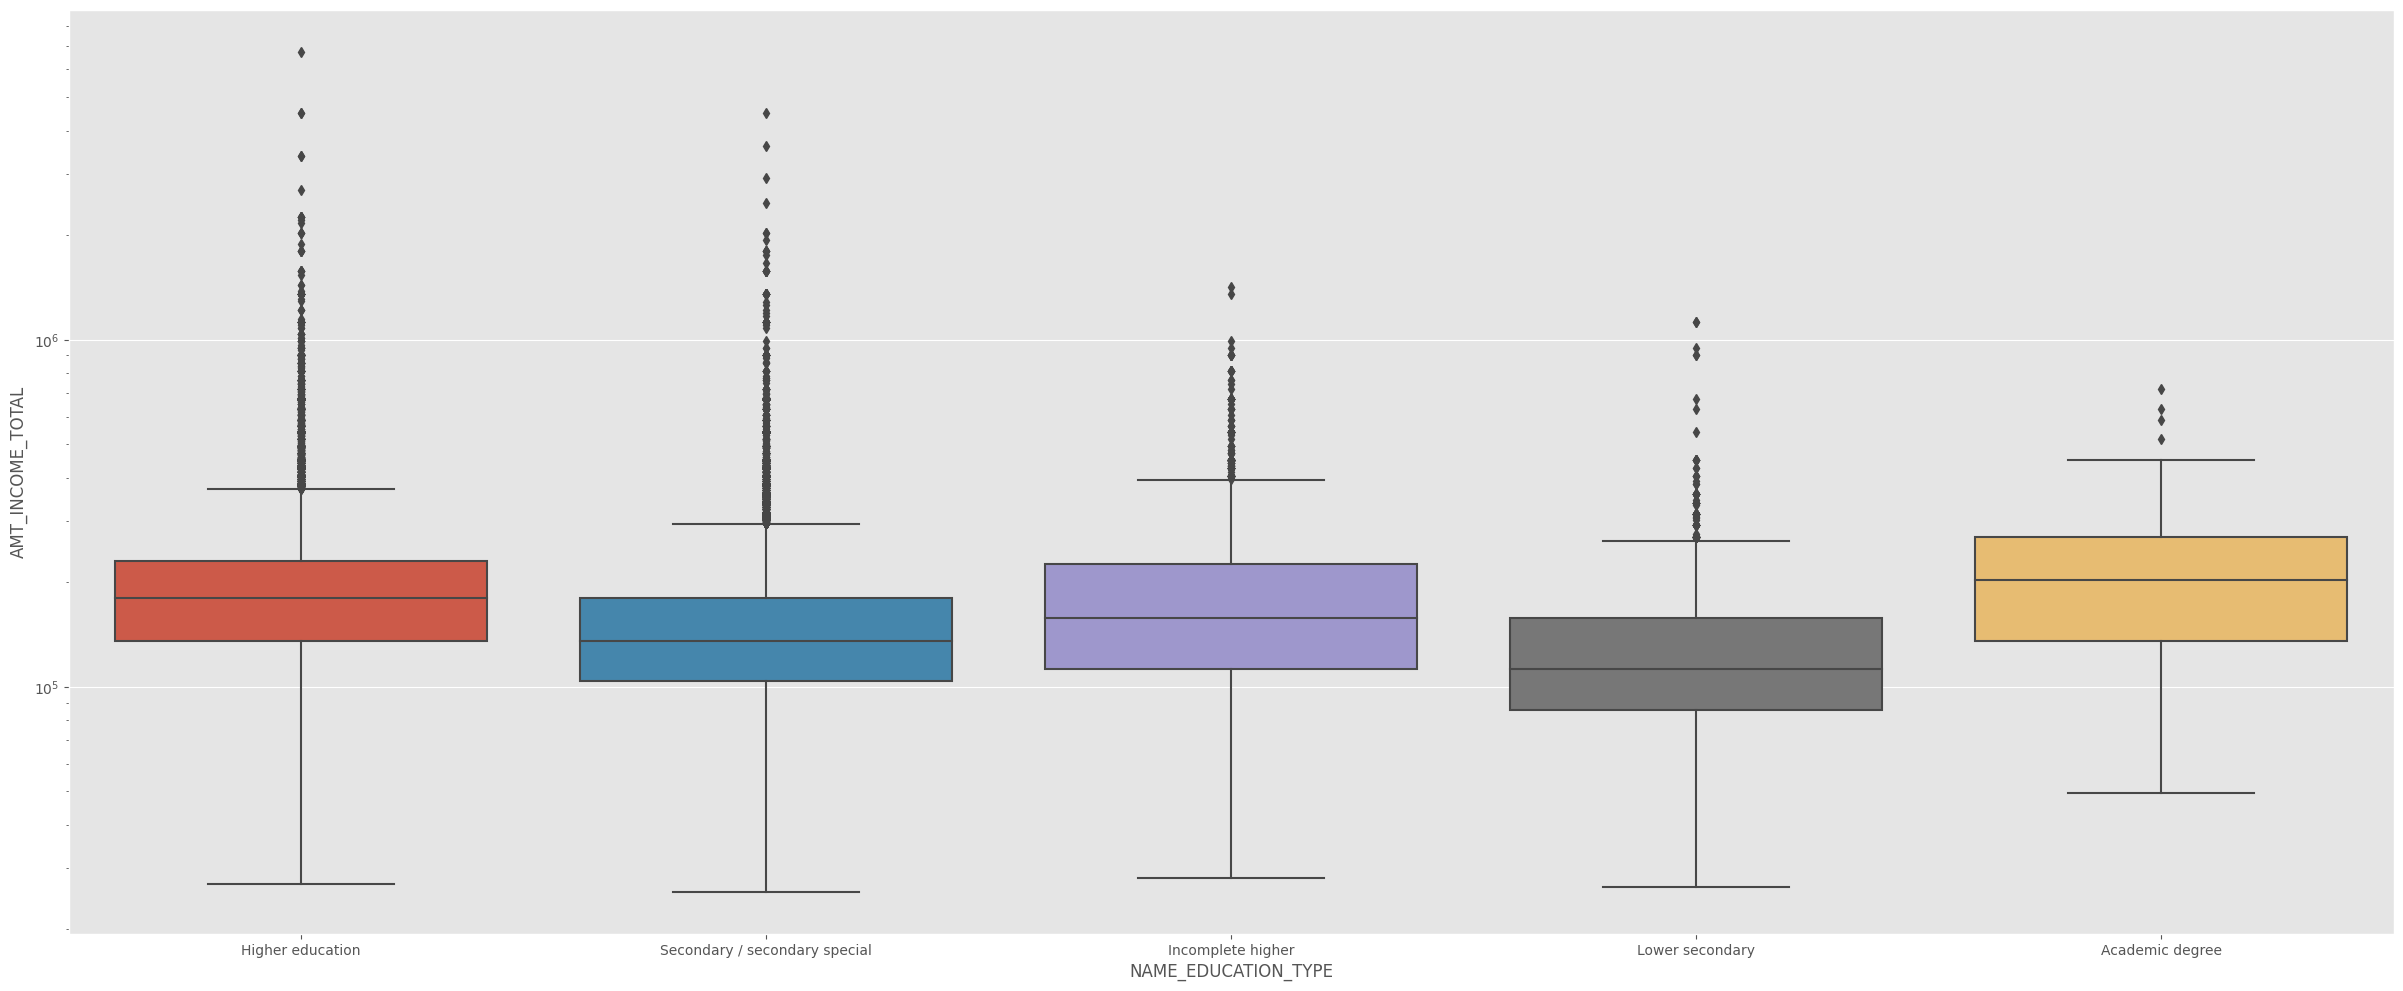

In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')

sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',
            hue ='NAME_FAMILY_STATUS')


* The clients whose marital status is separated have the highest mean income compared to others.
* Clients with a Higher Academic degree are having the greatest average salary.
* Clients who are married have widely varying income statistics.
* Lower secondary civil marriage family incomes are lower than those of others.
* Clients with a Lower Secondary degree are having the lowest average salary.
* Widow Clients with an Academic degree have a small number of outliers and lack the First and Third Quartiles. In addition, there are considerably fewer outliers among clients with academic degrees than among those with other levels of education.

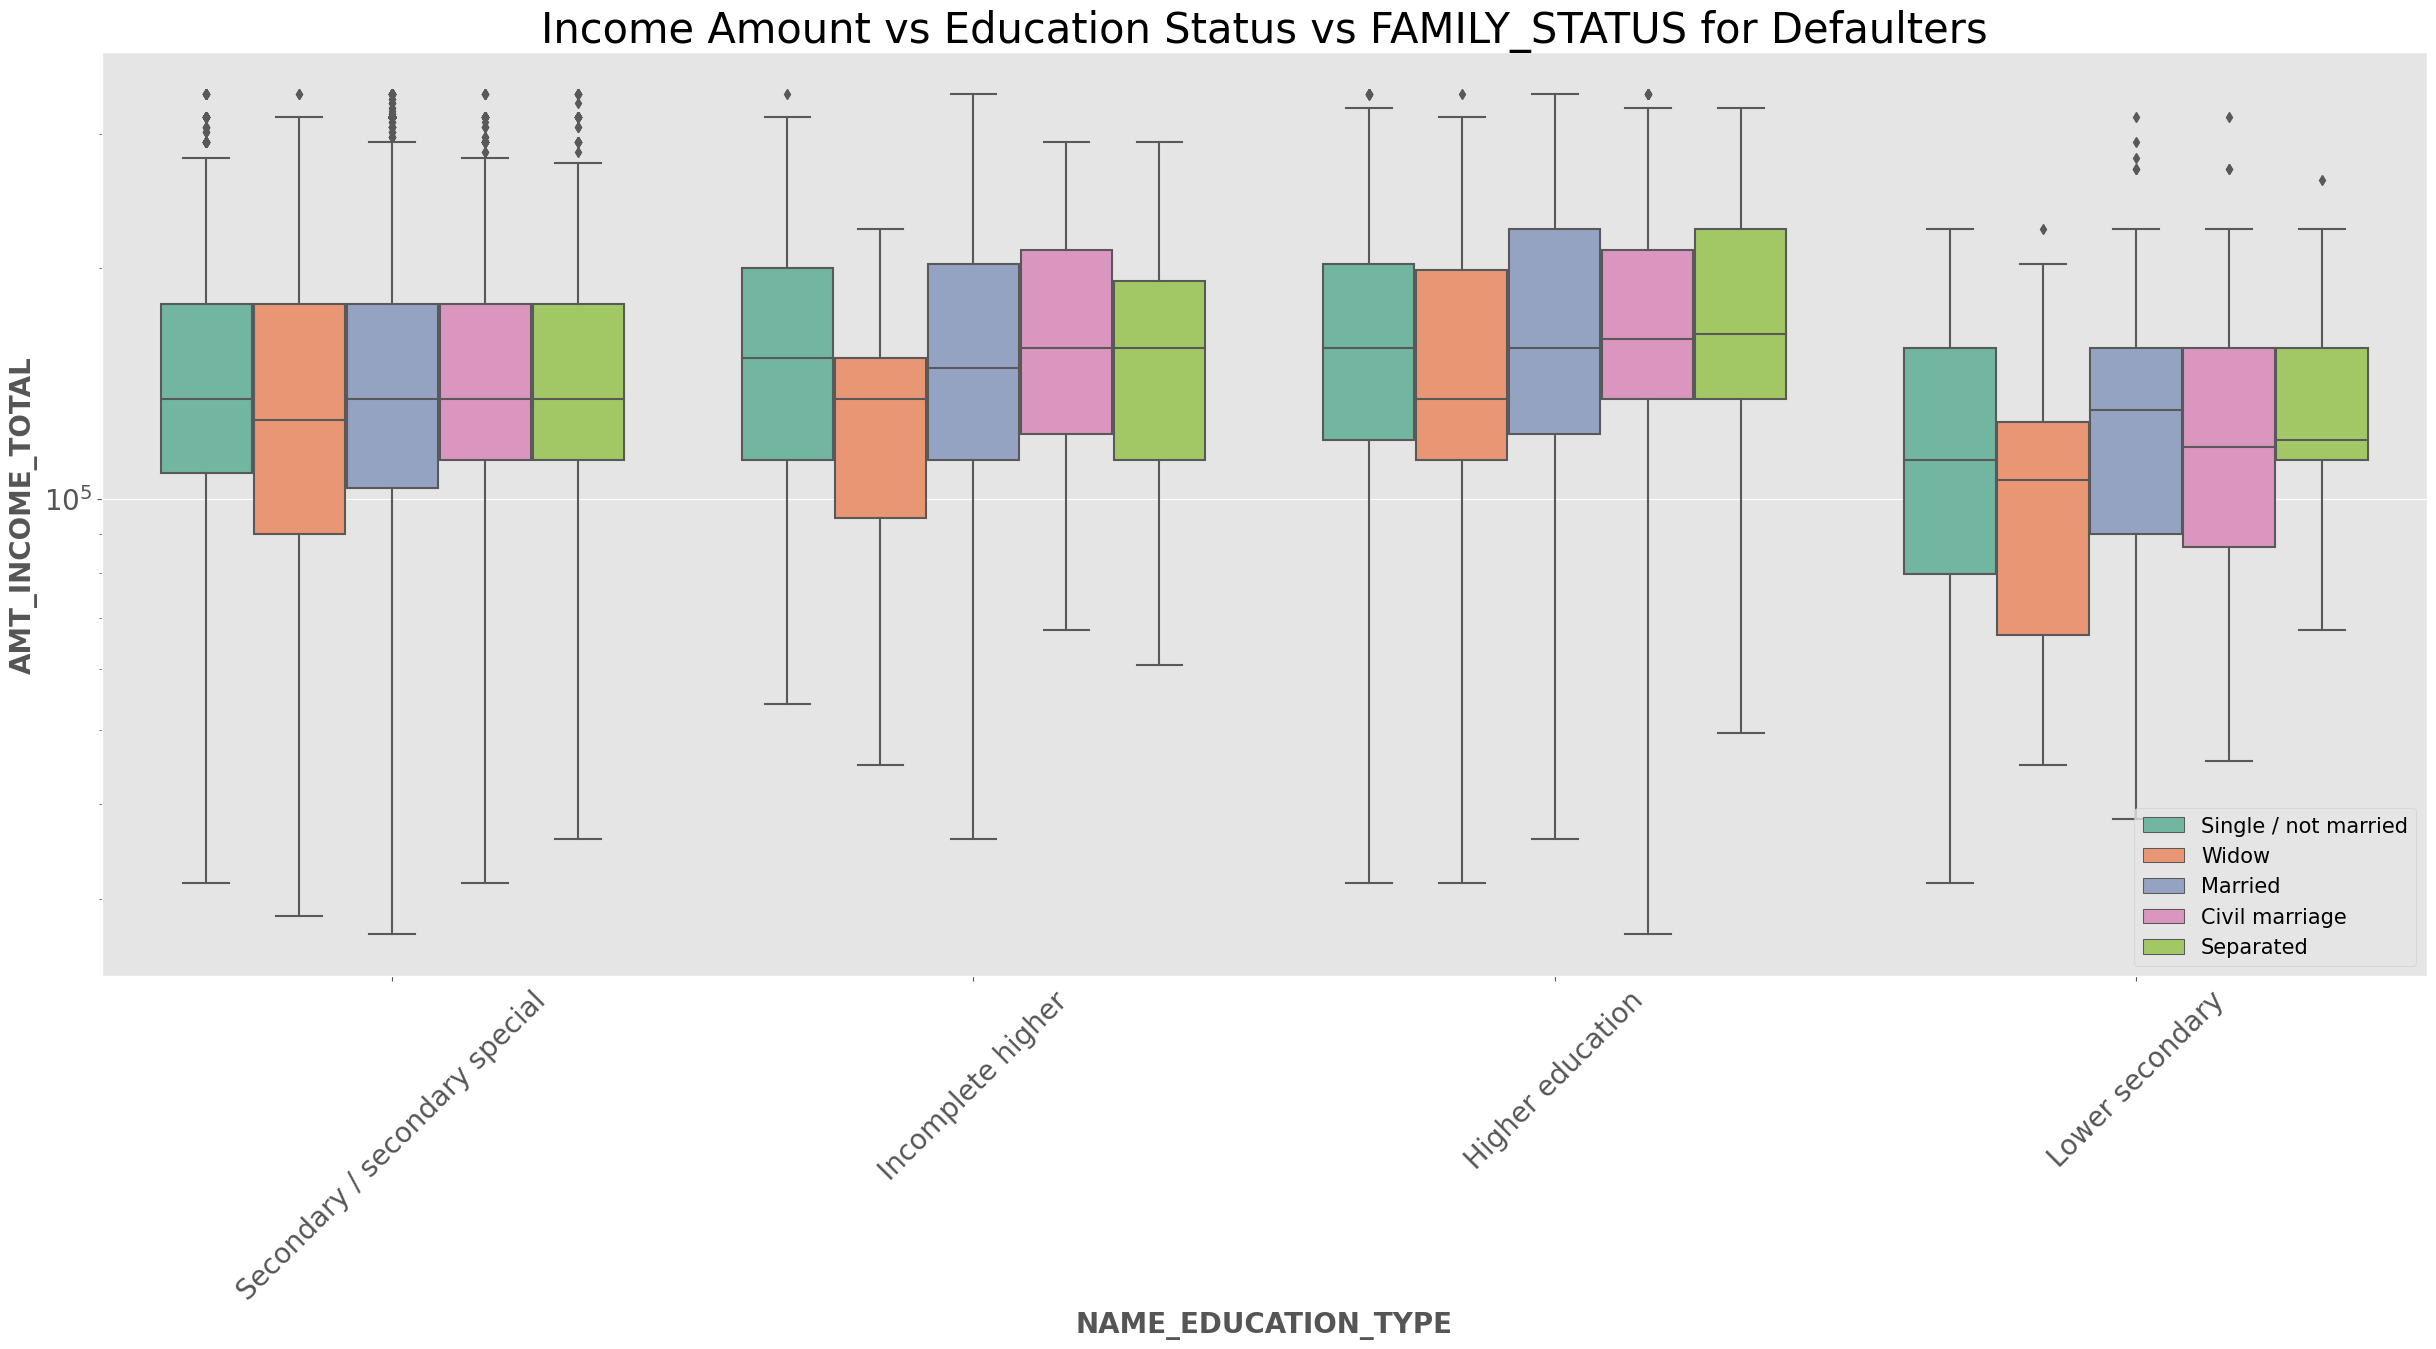

In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')

sns.boxplot(data =df_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')
plt.title('Income Amount vs Education Status vs FAMILY_STATUS for Defaulters',fontsize= 30)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 20, fontweight="bold")
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=360, fontsize=20)
plt.legend( loc = 'best',fontsize=15)

plt.show()

* Similar to Target0, based on the above boxplot for Education type 'Higher education', the income amount is the same regardless of family status
* Clients who default on their loans have comparatively lower income than Non-defaulters.
* Fewer outliers for those who own an Academic degree, yet their salary is rather more than those with a Higher education.


In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')

sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')
plt.title('Credit Amount vs Education Status vs FAMILY_STATUS for Non-Defaulters',fontsize= 30)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 20, fontweight="bold")
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=360, fontsize=20)
plt.legend( loc = 'best',fontsize=15)

plt.show()

* There are more outliers among clients with a higher degree and family statuses of marriage,single and civil marriage while clients who are having Academic degree are having fewer outliers.
* Clients who are married tend to take bigger higher credit loans.
* Widows and clients with an academic degree prefer to take out higher credit loans.
* Clients who completed their Higher education tend to take greater credit loans.


In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')

sns.boxplot(data =df_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')
plt.title('Credit Amount vs Education Status vs FAMILY_STATUS for Defaulters',fontsize= 30)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 20, fontweight="bold")
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=360, fontsize=20)
plt.legend( loc = 'best',fontsize=15)


plt.show()

* The majority of outliers belong to the Education types Higher education and Secondary.
* Clients who are having Academic degree and involved in a civil marriage are taking greater amount of credit loan
* According to the boxplot, customers who are married have the highest mean credit loan amount.
* Clients who are  married  with academic degree applied for a larger credit loan. And is free of outliers and Single clients with academic degrees have a very slim boxplot with no outliers
* Clients who completed their higher educaion tend to have the habit of taking greater amount of credit loans.

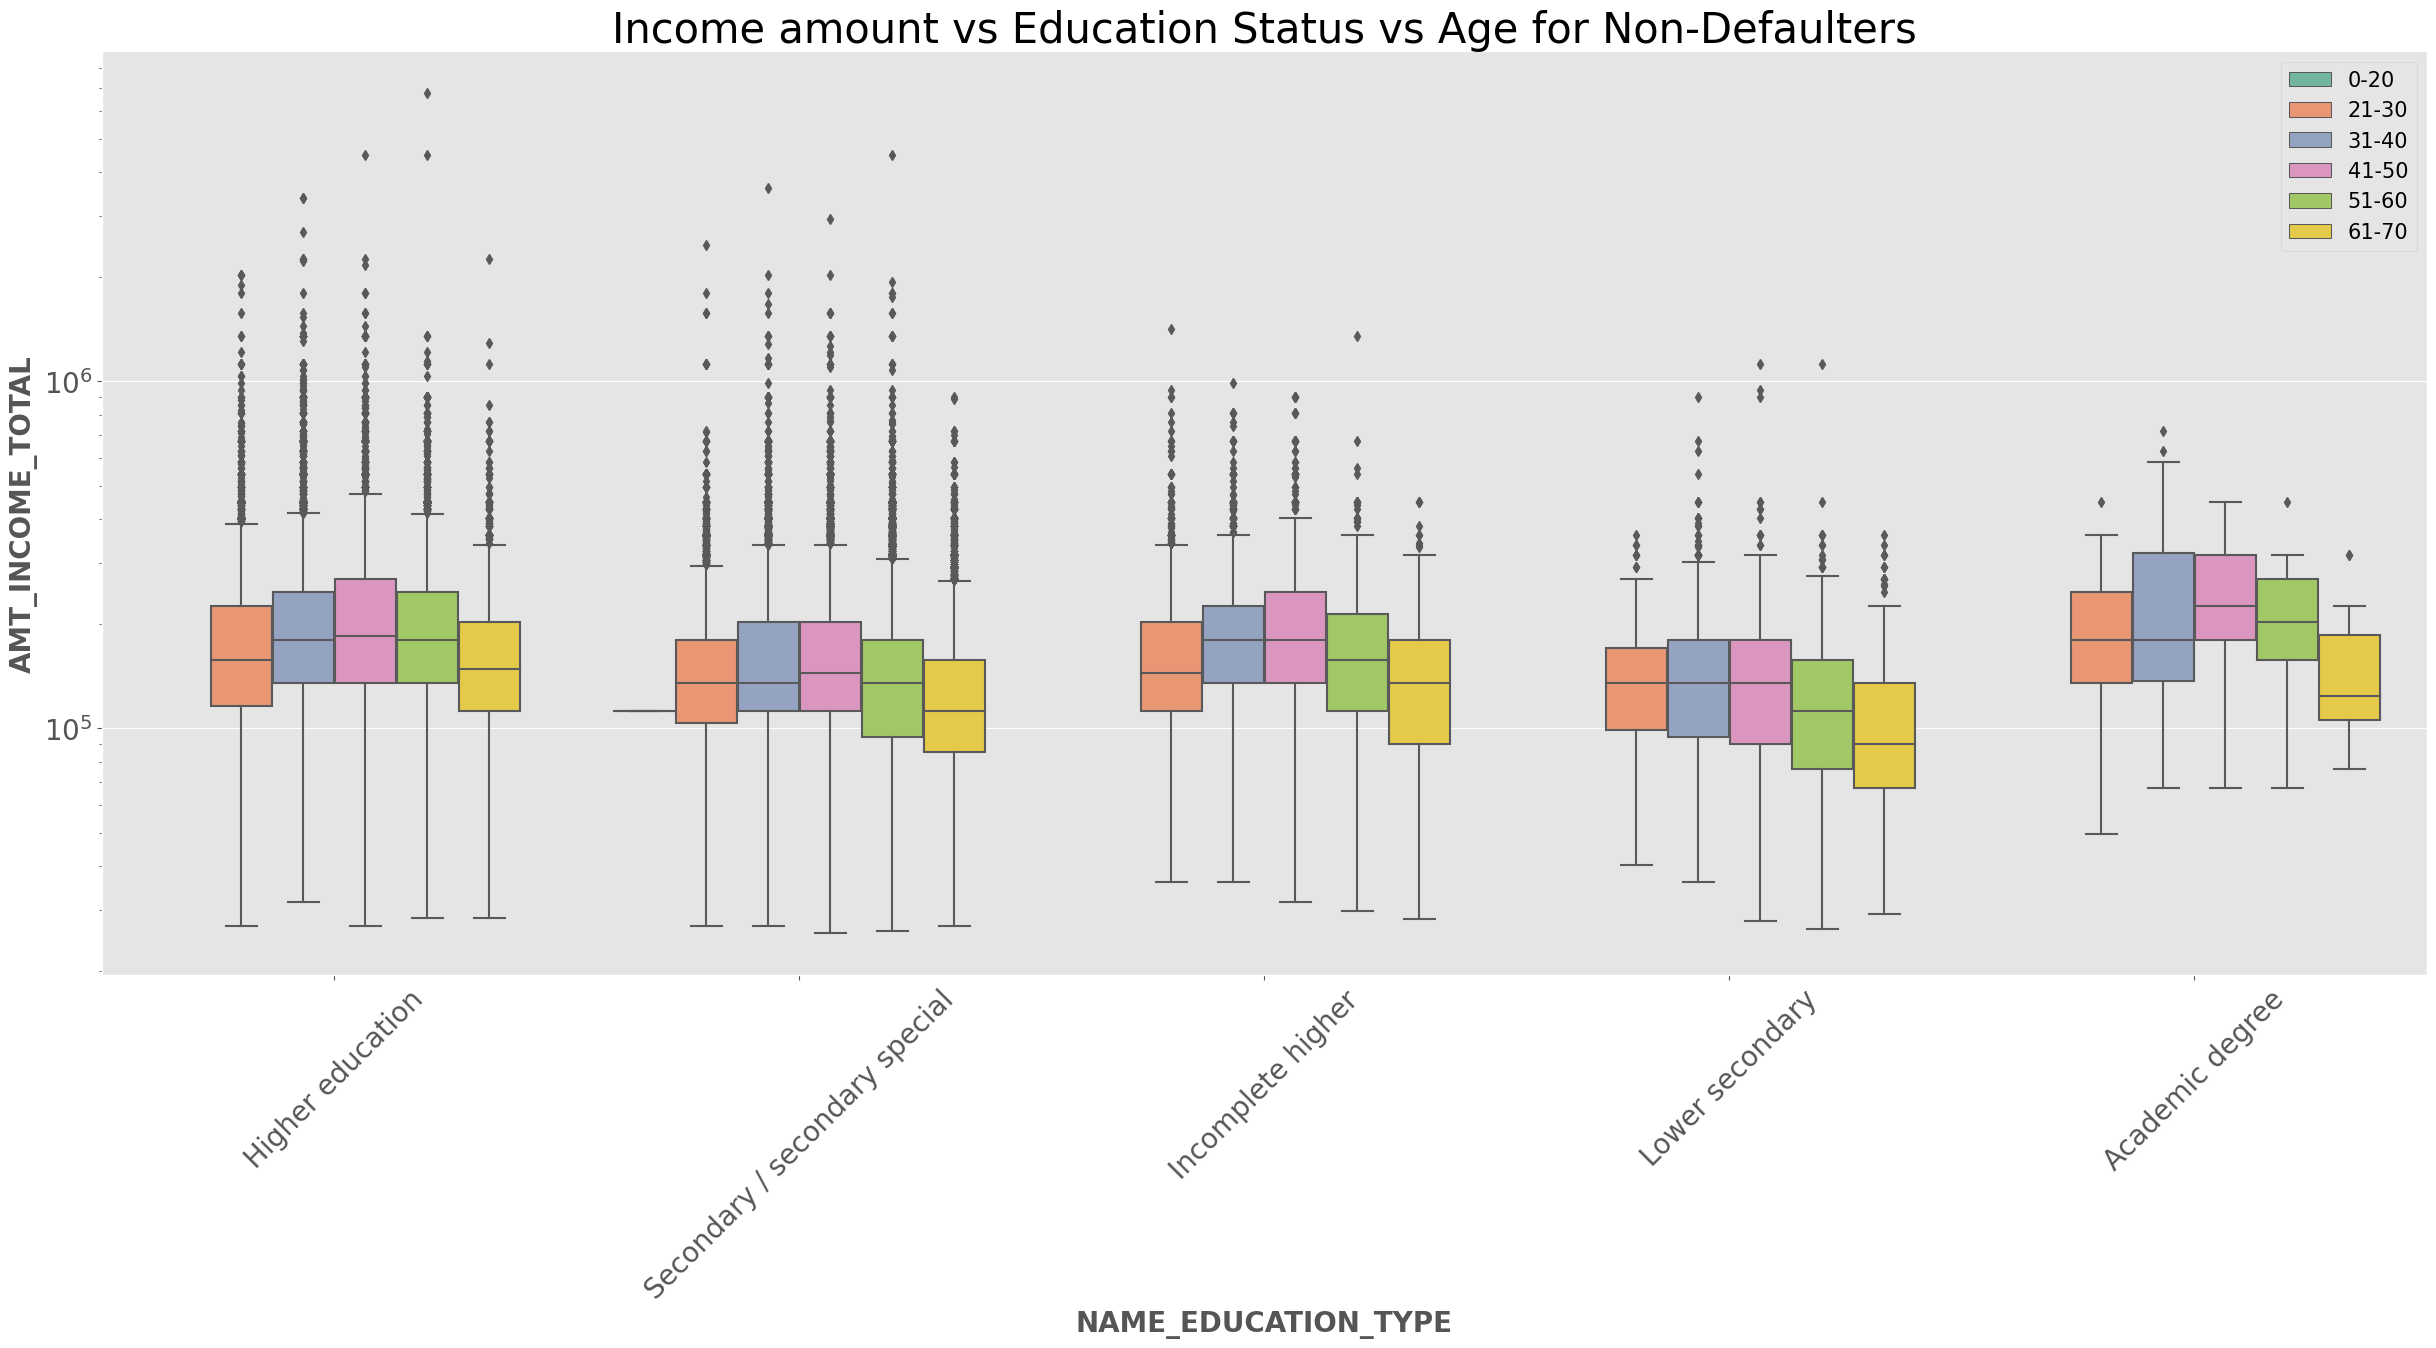

In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')

sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',
            hue ='DAYS_BIRTH_CAT',orient='v',palette='Set2')
plt.title('Income amount vs Education Status vs Age for Non-Defaulters',fontsize= 30)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 20, fontweight="bold")
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=360, fontsize=20)
plt.legend( loc = 'best',fontsize=15)

plt.show()

* Clients between the ages of 41-50 seem to be having the highest mean of income compared to others.
* Clients between the ages of 61-70 seem to be having the lowest mean of income compared to others.


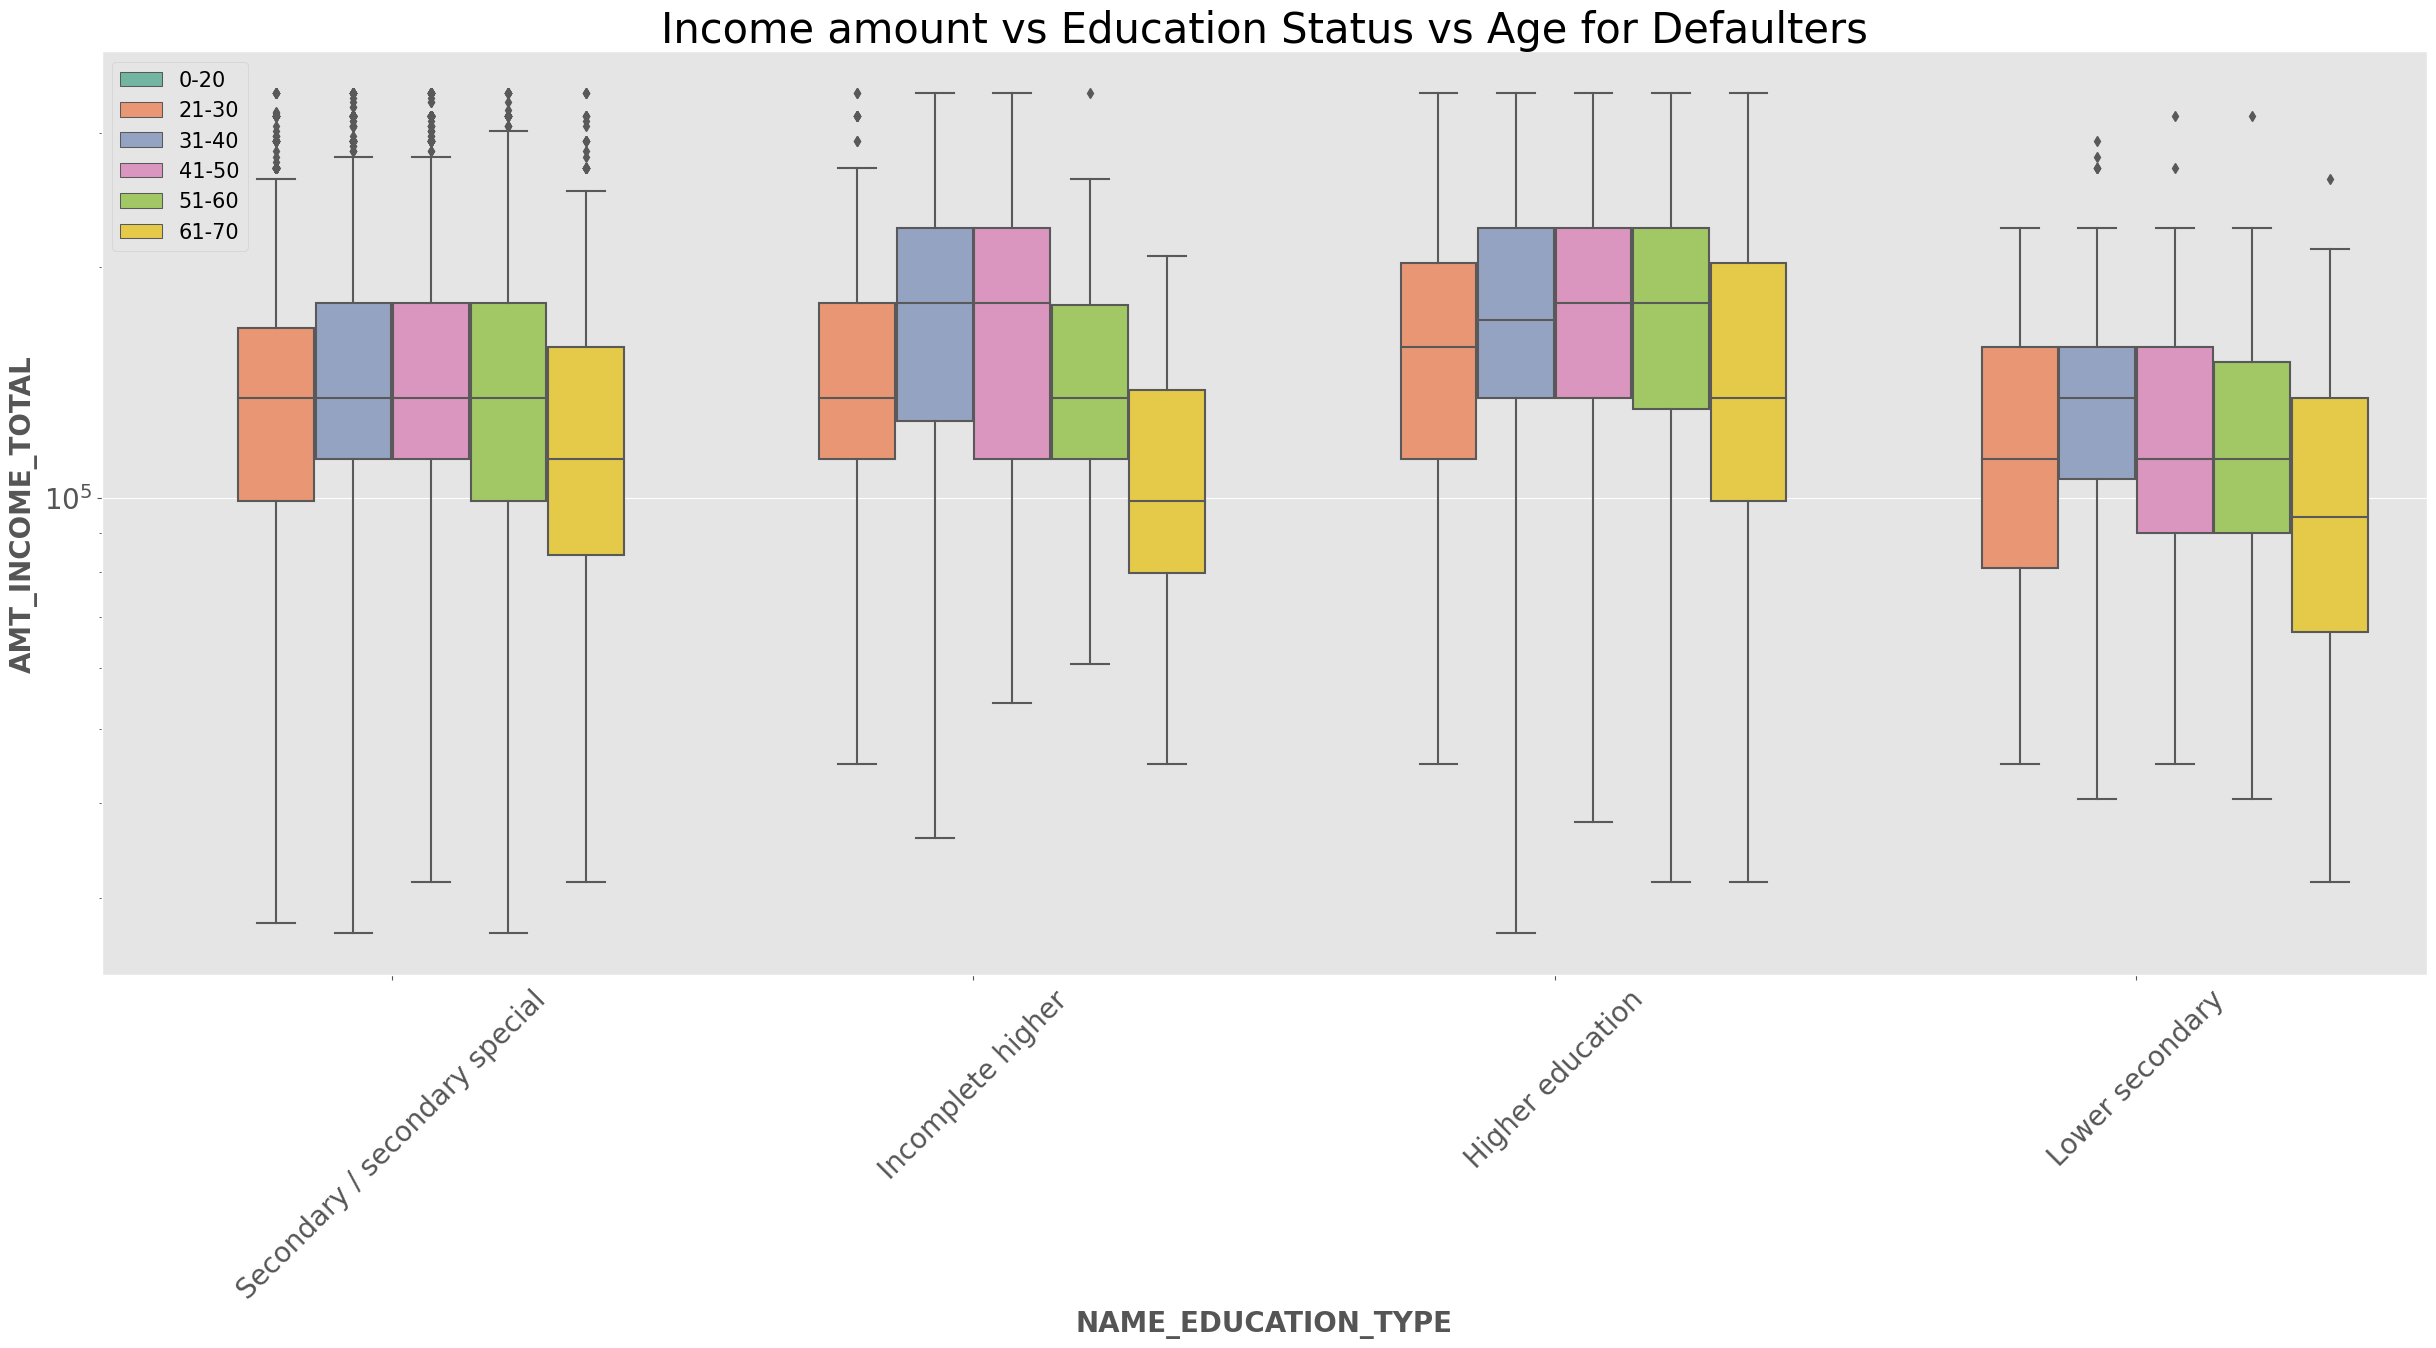

In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')

sns.boxplot(data =df_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',
            hue ='DAYS_BIRTH_CAT',orient='v',palette='Set2')
plt.title('Income amount vs Education Status vs Age for Defaulters',fontsize= 30)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 20, fontweight="bold")
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=360, fontsize=20)
plt.legend( loc = 'best',fontsize=15)


plt.show()

* Clients who fail on their loans often have a lower income than those who have non-payment issues.
* For Defaulters, Clients who are having Academic degree and ages between 31-40 are having the highestmean of income

In [ ]:
pd.pivot_table(data=df,index=['CODE_GENDER','AMT_INCOME_TOTAL_CAT'],
              columns=['NAME_EDUCATION_TYPE'],values='TARGET',aggfunc=np.mean)

NAME_EDUCATION_TYPE               Academic degree  Higher education  Incomplete higher  Lower secondary  Secondary / secondary special
CODE_GENDER AMT_INCOME_TOTAL_CAT                                                                                                      
F           VeryLow                           0.0          0.056974           0.088068         0.080084                       0.076543
            Low                               0.0          0.048922           0.080952         0.112125                       0.079083
            Medium                            0.0          0.052102           0.082184         0.087167                       0.078316
            High                              0.0          0.048977           0.073333         0.118182                       0.075888
            VeryHigh                          0.0          0.041582           0.092391         0.000000                       0.072740
M           VeryLow                           0.0          0.076621           0.132701         0.126984                       0.115828
            Low                               0.0          0.075743           0.103248         0.141700                       0.124731
            Medium                            0.0          0.074834           0.089399         0.151220                       0.118403
            High                              0.0          0.063582           0.096774         0.102740                       0.102379
            VeryHigh                          0.0          0.050813           0.064103         0.137931                       0.100477

* Male Clients with Lower Secondary Education who earn a very low to moderate income have a high chance of default.
* Male Clients with  Secondary Education who earn a very low to moderate income have a high chance of default.
* Customers who are male, have an incomplete education, and earn very low salaries are at a significant risk of default.
* Male Clients with a Academic degree do not fail on their loans.
* Women with an academic degree and a high income have a greater likelihood of defaulting on their loans.

### Correlation

In [ ]:
num_cols = df.select_dtypes(include='number')
num_cols.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [ ]:
corr1 = df_1.iloc[0:,2:]
corr0 = df_0.iloc[0:,2:]
corr1.drop(columns=['FLAG_MOBIL','FLAG_EMAIL'],inplace=True)
corr0.drop(columns=['FLAG_MOBIL','FLAG_EMAIL'],inplace=True)



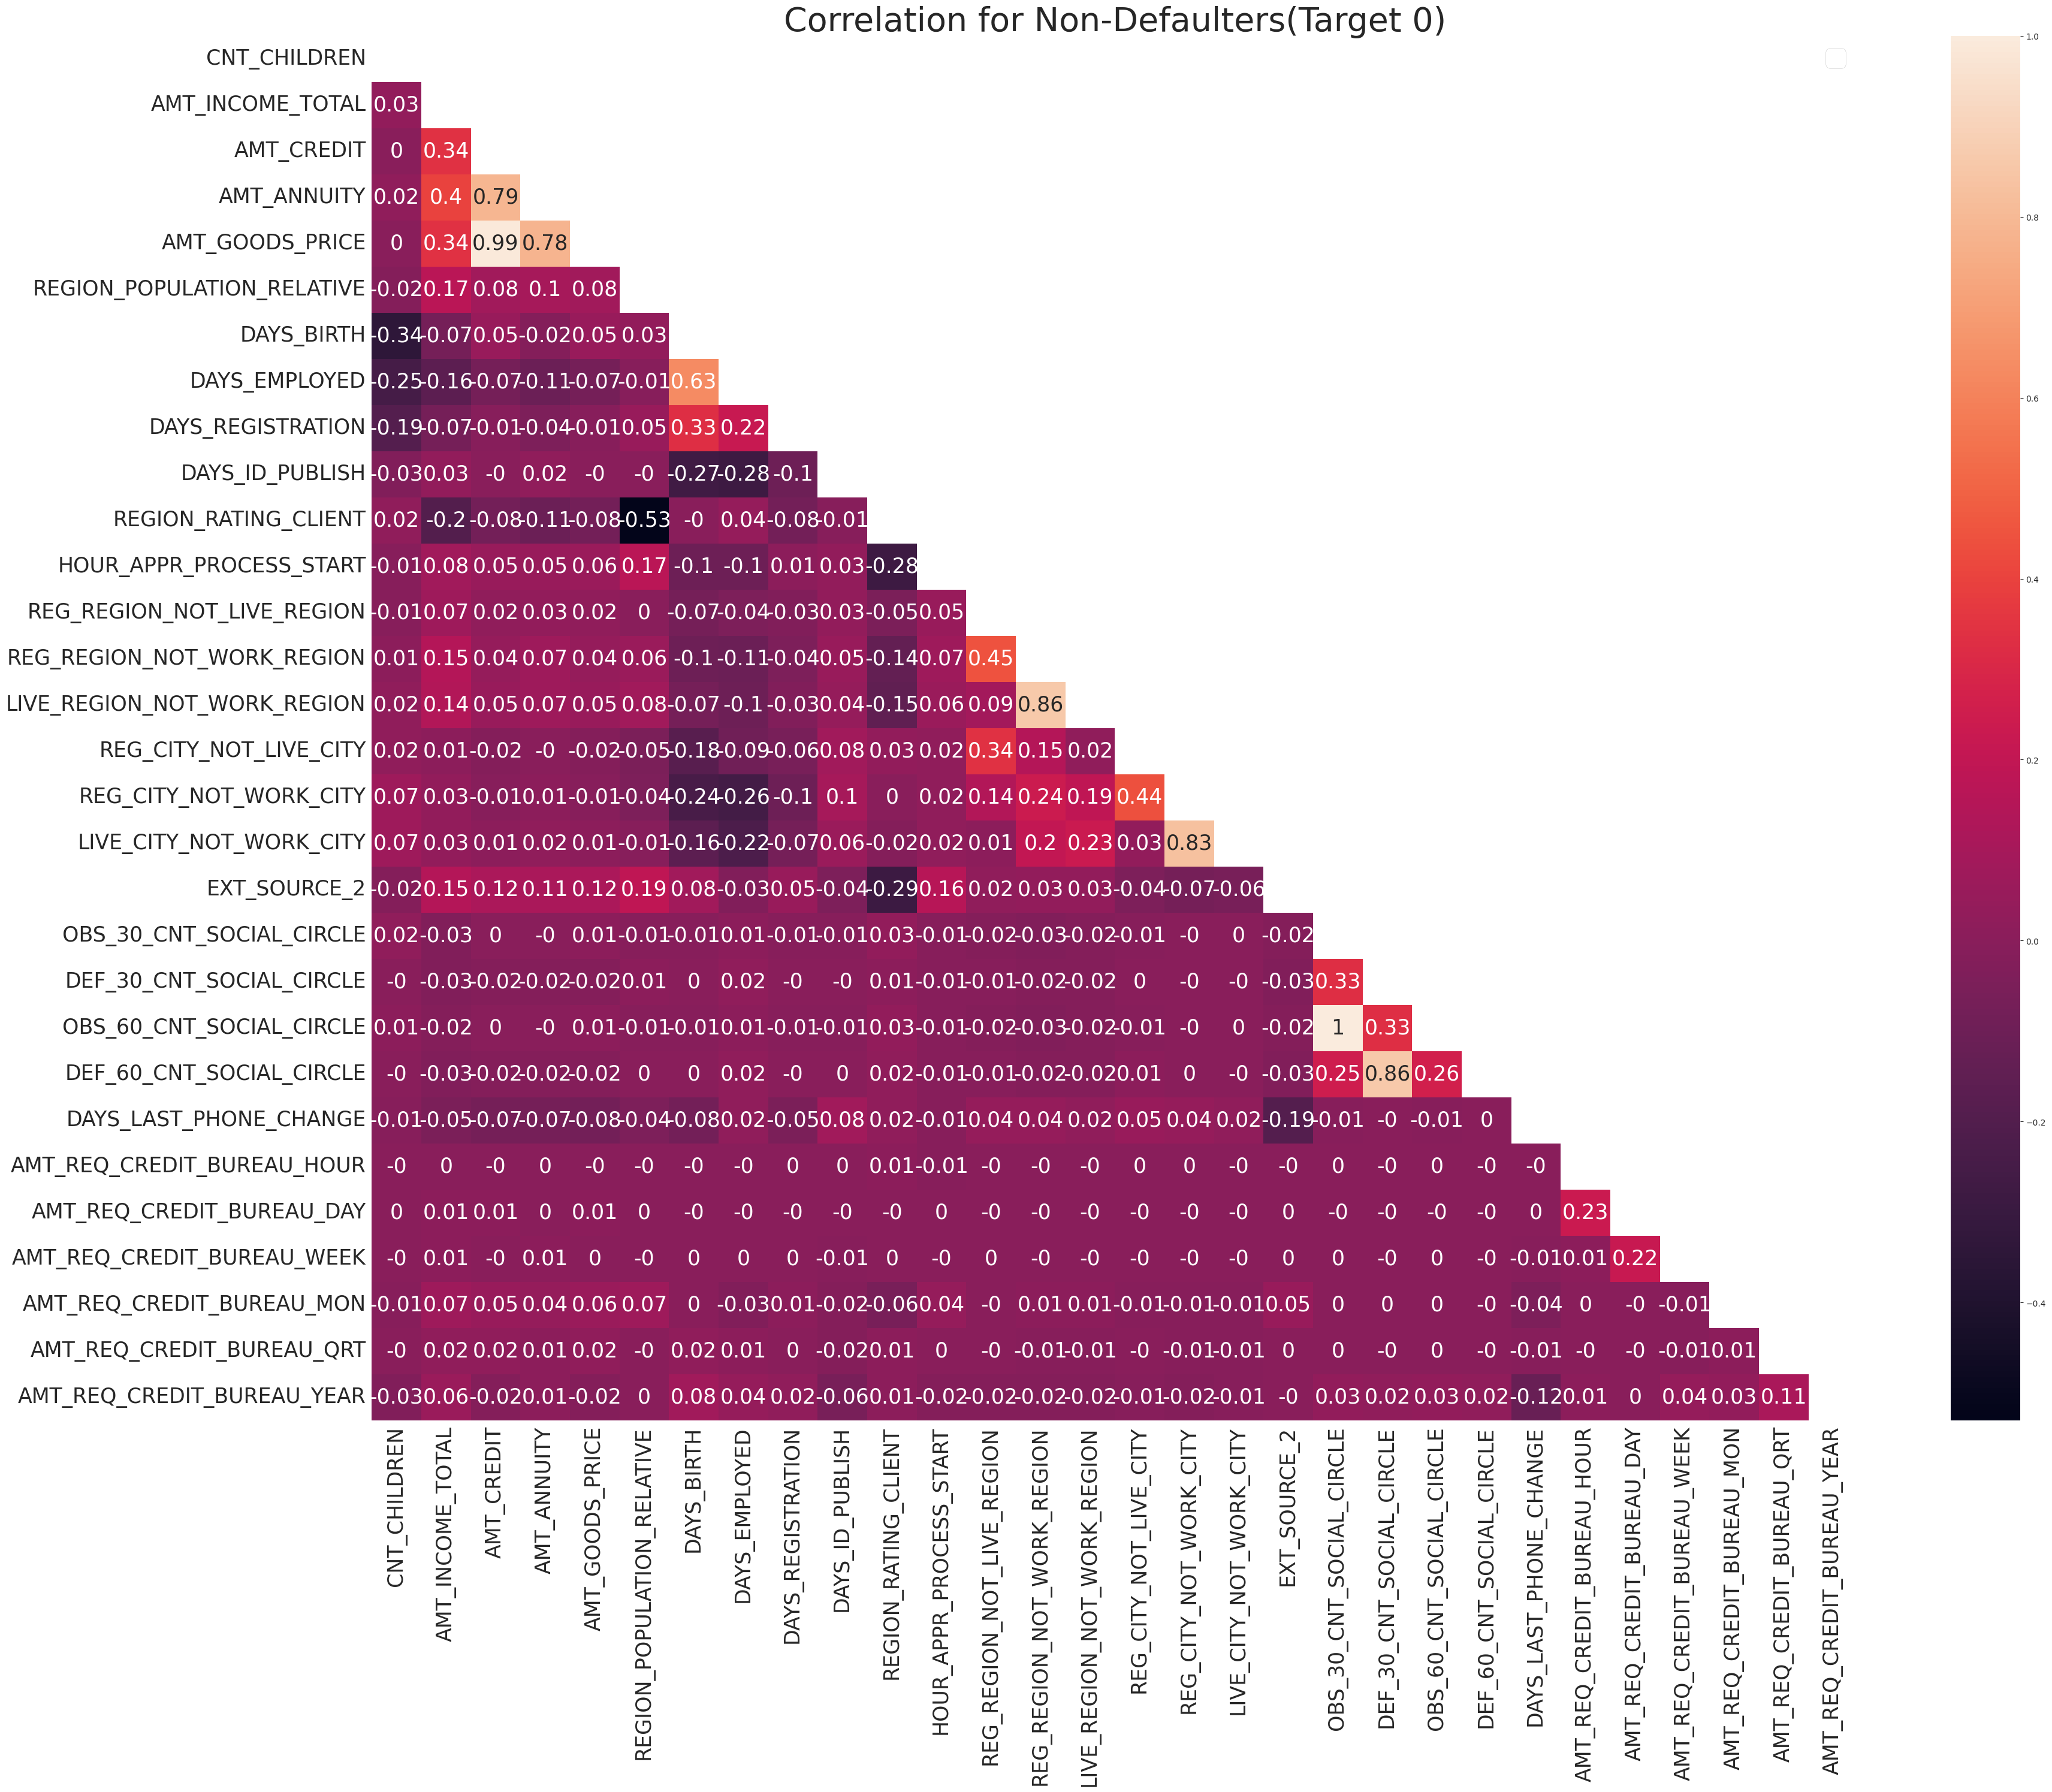

In [ ]:
mask = np.zeros_like(corr0.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(40,30))
sns.set_style('white')

sns.heatmap(corr0.corr().round(2),mask=mask,annot=True,annot_kws={'size':25})
plt.title('Correlation for Non-Defaulters(Target 0)',fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=30)

plt.show()

* AMT_CREDIT, AMT_ANNUITY, AMT_INCOME_TOTAL and AMT_GOODS_PRICE are strongly related.
* CREDIT_INCOME_RATIO increases with increase in AMT_CREDIT and AMT_GOODS_PRICE, decreases with increase in AMT_INCOME_TOTAL.
* Dense population(REGION_POPULATION_RELATIVE) indicates a quality grade(REGION_RATING_CLIENT)
* Those residing in prime locations(REGION_RATING_CLIENT) earn higher salaries(AMT_INCOME_TOTAL) comparing to people who dosen't.
* Individuals who have defaulted on a 30-day payment are also likely to default on a 60-day payment.
* Elderly individuals have higher credit to income ratios.
* Credit amounts are greater in densely populated regions.
* Clients have fewer children in densely crowded areas.

In [ ]:
mask = np.zeros_like(corr1.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(40,30))
sns.set_style('white')

sns.heatmap(corr1.corr().round(2),mask=mask,annot=True,annot_kws={'size':25})
plt.title('Correlation for Defaulters(Target 1)',fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

This heat map for Defaulters has nearly identical characteristics to that of Non-Defaulters. But for a few key differences. These are enumerated below.
* The permanent address of the client does not match the contact address of the client are having fewer childern.
* The client's permanent address does not match his or her workplace address are also having fewer children.

pearson correlation coefficient

In [ ]:
from scipy.stats import pearsonr
def pearson(col1,col2):
  corr,_ = pearsonr(df[col1], df[col2])
  print('Pearsons correlation: %.3f' % corr)

In [ ]:
pearson('AMT_GOODS_PRICE','AMT_CREDIT')
pearson('AMT_ANNUITY','AMT_CREDIT')

Pearsons correlation: 0.982
Pearsons correlation: 0.758


Regression plot

In [ ]:
def regnum_plot(col1,col2):
    sns.lmplot(data=df_1,x=col1,y=col2)
    plt.show()

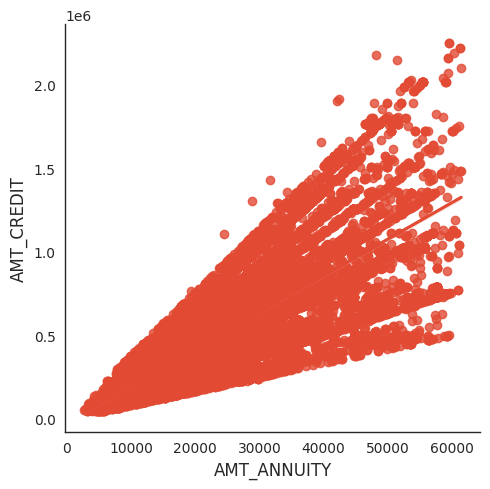

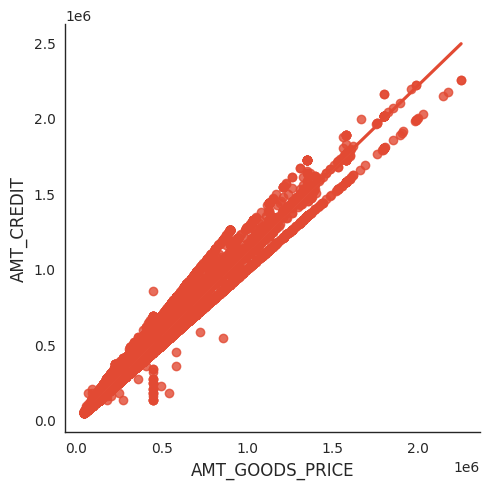

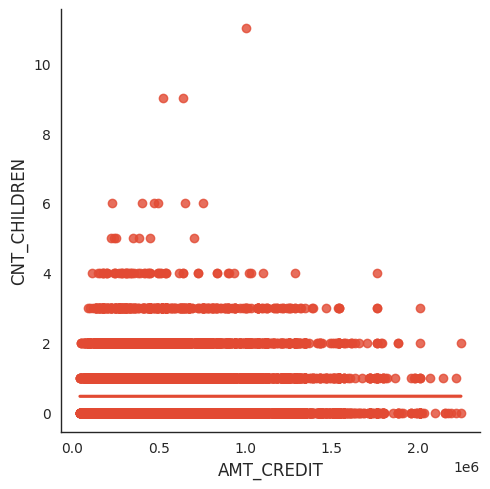

In [ ]:
regnum_plot('AMT_ANNUITY','AMT_CREDIT')
regnum_plot('AMT_GOODS_PRICE','AMT_CREDIT')
regnum_plot('AMT_CREDIT','CNT_CHILDREN')


Normal Distribution

In [ ]:
from scipy.stats import norm
def normal_dist(X,mean,std,parameter):
  plt.plot(x, norm.pdf(x, mean/(10**5), std/(10**5)), label=parameter)
  plt.ylabel('Density')
  plt.xlabel('x')
  plt.title('Normal Distributions', fontsize=14)

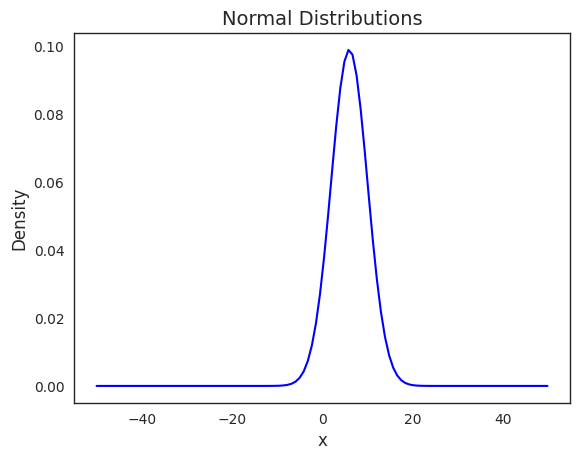

In [ ]:
x=np.arange(-50,50,0.9)
normal_dist(x,599158.2052,402934.594,'AMT_CREDIT')
#normal_dist(27107.2447,14564.2673,'AMT_ANNUITY')
#normal_dist(0.0814,0.2734,'TARGET')
#normal_dist(538574.637,370237.151,'AMT_GOODS_PRICE')


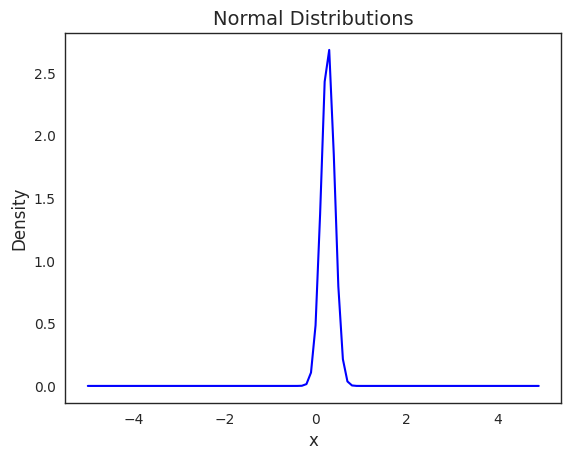

In [ ]:
x=np.arange(-5,5,0.1)
normal_dist(x,27107.2447,14564.2673,'AMT_ANNUITY')

In [ ]:
x=np.arange(-1,1,0.1)
normal_dist(x,0.0814,0.2734,'TARGET')

NameError: ignored

In [ ]:
sns.kdeplot(df['AMT_ANNUITY'],shade=True)

NameError: ignored

In [ ]:
sns.kdeplot(df['TARGET'],shade=True)

NameError: ignored

**Hypothesis Testing**

Z-Test

In [ ]:
from scipy.stats import kurtosis, skew, stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
Ho = "There is no gender bias in default" # Stating the Null Hypothesis
Ha = "Default cases is based on the gender" # Stating the Alternate Hypothesis

x = np.array(df[df.CODE_GENDER == 'F'].TARGET)
y = np.array(df[df.CODE_GENDER == 'M'].TARGET)

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

In [ ]:
Ho = "The person who has own flat and car will  default" # Stating the Null Hypothesis
Ha = "The person who has own flat and car will not default" # Stating the Alternate Hypothesis

x = np.array(df[df.FLAG_OWN_REALTY == 'Y'].TARGET)
y = np.array(df[df.FLAG_OWN_CAR == 'Y'].TARGET)

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

In [ ]:
Ho = "The loan type has dependancy to default" # Stating the Null Hypothesis
Ha = "The loan type has not any dependancy to default" # Stating the Alternate Hypothesis

x = np.array(df[df.NAME_CONTRACT_TYPE == 'Cash loans'].TARGET)
y = np.array(df[df.NAME_CONTRACT_TYPE == 'Revolving loans'].TARGET)

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

In [ ]:
df['TARGET_CAT']=df['TARGET'].apply(lambda x:'YES' if x==1 else 'NO')

Ho = "There is a relation between loan default and tier city" # Stating the Null Hypothesis
Ha = "There is no relation between loan default and city tier" # Stating the Alternate Hypothesis
z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

T-test

In [ ]:
Ho = "There is no gender bias in default" # Stating the Null Hypothesis
Ha = "Default cases is based on the gender" # Stating the Alternate Hypothesis

x = np.array(df[df.CODE_GENDER == 'F'].TARGET.sample(n=25))
y = np.array(df[df.CODE_GENDER == 'M'].TARGET.sample(n=25))

p_value  = stests.ttest_ind(x,y)[1]  #Performing an Independent t-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

In [ ]:
Ho = "The loan type has dependancy to default" # Stating the Null Hypothesis
Ha = "The loan type has not any dependancy to default" # Stating the Alternate Hypothesis

x = np.array(df[df.NAME_CONTRACT_TYPE == 'Cash loans'].TARGET.sample(n=30))
y = np.array(df[df.NAME_CONTRACT_TYPE == 'Revolving loans'].TARGET.sample(n=30) )

p_value  = stests.ttest_ind(x,y)[1]  #Performing an Independent t-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

In [ ]:
Ho = "The person who has own flat and car will  default" # Stating the Null Hypothesis
Ha = "The person who has own flat and car will not default" # Stating the Alternate Hypothesis

x = np.array(df[df.FLAG_OWN_REALTY == 'Y'].TARGET.sample(n=25))
y = np.array(df[df.FLAG_OWN_CAR == 'Y'].TARGET .sample(n=25))


p_value  = stests.ttest_ind(x,y)[1]  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Linear regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

df=pd.read_csv()

In [ ]:
target='AMT_CREDIT'
features=['AMT_INCOME_TOTAL','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_ANNUITY','CREDIT_INCOME_RATIO','DAYS_LAST_PHONE_CHANGE','CNT_CHILDREN']
ml_subset=df.dropna(subset=[target])
x=ml_subset[features]
y=ml_subset[target]
imputer=SimpleImputer(strategy='mean')
x_imputed=imputer.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_imputed,y,test_size=0.4,random_state=42)
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
lr_model=LinearRegression()
lr_model.fit(x_train_scaled,y_train)
lr_predict=lr_model.predict(x_test_scaled)
print(r2_score(y_test,lr_predict),mean_squared_error(y_test,lr_predict))

NameError: ignored

In [ ]:
target='TARGET'
features=['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_ANNUITY']
ml_subset=df.dropna(subset=[target])
x=ml_subset[features]
y=ml_subset[target]
imputer=SimpleImputer(strategy='mean')
x_imputed=imputer.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_imputed,y,test_size=0.4,random_state=42)
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
lr_model=LinearRegression()
lr_model.fit(x_train_scaled,y_train)
lr_predict=lr_model.predict(x_test_scaled)
print(r2_score(y_test,lr_predict),mean_squared_error(y_test,lr_predict))

NameError: ignored

## **ANOVA - SINGLE VARIANCE**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

Ho = "There is no gender bias in default" # Stating the Null Hypothesis
Ha = "Default cases is based on the gender" # Stating the Alternate Hypothesis

male = df.loc[df["CODE_GENDER"] == 'F']["TARGET"]
female = df.loc[df["CODE_GENDER"] == 'M']["TARGET"]


stat,p_value = f_oneway(male,female)
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

NameError: ignored

In [ ]:
Ho = "The person who has own flat and car will  default" # Stating the Null Hypothesis
Ha = "The person who has own flat and car will not default" # Stating the Alternate Hypothesis

x = np.array(df[df.FLAG_OWN_REALTY == 'Y'].TARGET)
y = np.array(df[df.FLAG_OWN_CAR == 'Y'].TARGET)
stat,p_value = f_oneway(x,y)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')



In [ ]:
Ho = "The loan type has dependancy to default" # Stating the Null Hypothesis
Ha = "The loan type has not any dependancy to default" # Stating the Alternate Hypothesis

x = np.array(df[df.NAME_CONTRACT_TYPE == 'Cash loans'].TARGET)
y = np.array(df[df.NAME_CONTRACT_TYPE == 'Revolving loans'].TARGET)

stat, p_value  =  f_oneway(x,y)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')